# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

warnings.filterwarnings('ignore')

In [2]:
## Load data set
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA


In [3]:
##data shape
df.shape

(2460, 9)

In [4]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


Overview, we can see that there are 2460 observations and 9 columns in the dataset.

Category variables include:

- Outcome

Numeric variables include:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age


In [5]:
## Display the summary statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


With overview table, we can realize that Glucose, BloodPressure, SkinThickness, Insulin, BMI contain zero values. These values are not acceptable and should be replaced with NaN.

In [6]:
# Fill zero values with NaN
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

In [7]:
# Check overview data again
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2443.000000,2346.000000,1743.000000,1279.000000,2429.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,122.448219,72.263853,28.977051,154.100860,32.398724,0.491440,32.821951,0.390244
std,3.296458,30.231378,11.821553,10.189228,121.754763,6.958756,0.363917,11.251208,0.487904
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,21.000000,73.000000,27.300000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,120.000000,32.300000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,36.000000,192.000000,36.600000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Identify Missing Data

In [8]:
# Identify Missing Data
# Check for NaNs that might represent missing data
columns_with_nans = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Percentage of NaNs in each column:")
for column in columns_with_nans:
    missing_percentage = df[column].isna().mean() * 100
    print(f'{column}: {missing_percentage:.2f}% NaNs')

# Display the number of missing values
print("Number of missing values in each column:")
print(df.isnull().sum())

Percentage of NaNs in each column:
Glucose: 0.69% NaNs
BloodPressure: 4.63% NaNs
SkinThickness: 29.15% NaNs
Insulin: 48.01% NaNs
BMI: 1.26% NaNs
Number of missing values in each column:
Pregnancies                    0
Glucose                       17
BloodPressure                114
SkinThickness                717
Insulin                     1181
BMI                           31
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


# Missing Data Observations

- **Glucose**: 0.69% NaNs, indicating minimal missing data.
- **BloodPressure**: 4.63% NaNs, indicating some missing data.
- **SkinThickness**: 29.15% NaNs, indicating substantial missing data.
- **Insulin**: 48.01% NaNs, indicating substantial missing data.
- **BMI**: 1.26% NaNs, indicating minimal missing data.

The columns **SkinThickness** and **Insulin** have a significant proportion of missing data.


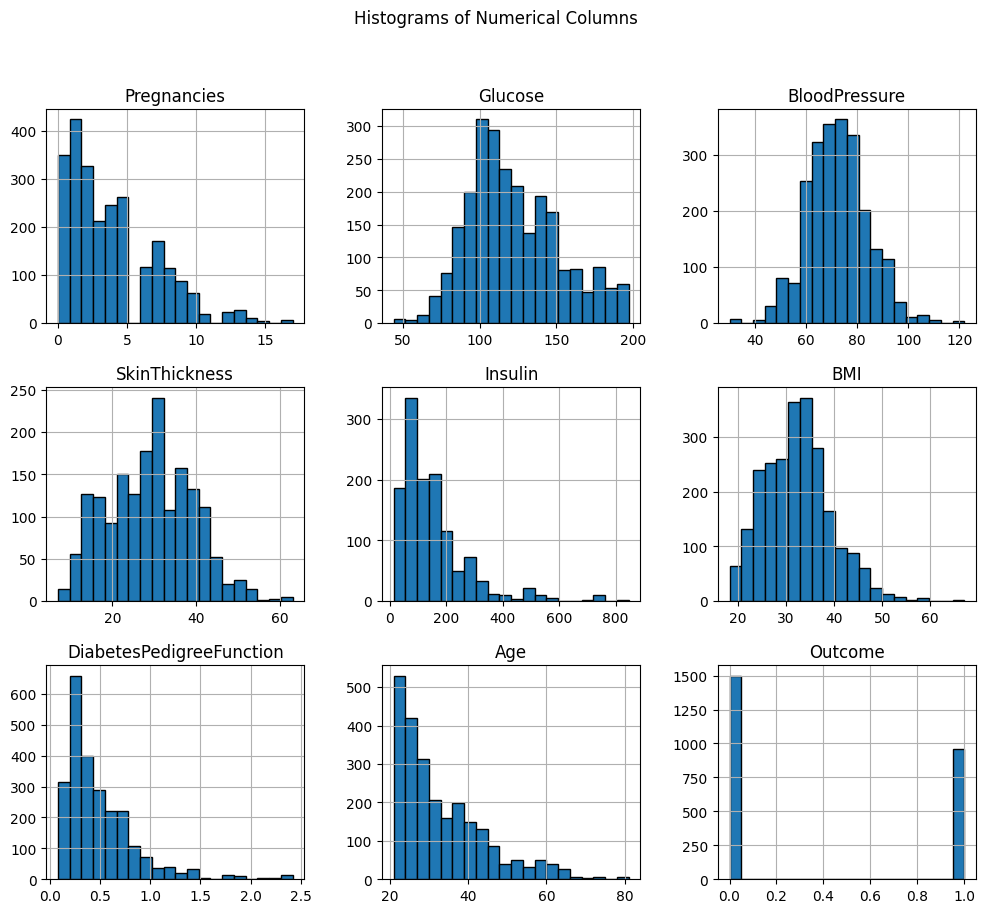

In [9]:
# Plot histograms for all numerical columns
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

## Observations from the Histograms

- **Pregnancies**: The distribution is skewed to the right, with most women having fewer pregnancies.
- **Glucose**: The distribution appears approximately normal but with a noticeable skew to the right.
- **BloodPressure**: The distribution shows some skewness, possibly with a concentration around the mean.
- **SkinThickness**: There is a large number of zero values, which might indicate missing or not measured data.
- **Insulin**: Similar to SkinThickness, many values are zero, suggesting missing or unmeasured data.
- **BMI**: The distribution appears roughly normal with some skewness.
- **DiabetesPedigreeFunction**: This distribution is heavily skewed to the right.
- **Age**: The distribution is right-skewed, with more younger individuals.
- **Outcome**: This binary variable is approximately balanced.


## Identify Outliers


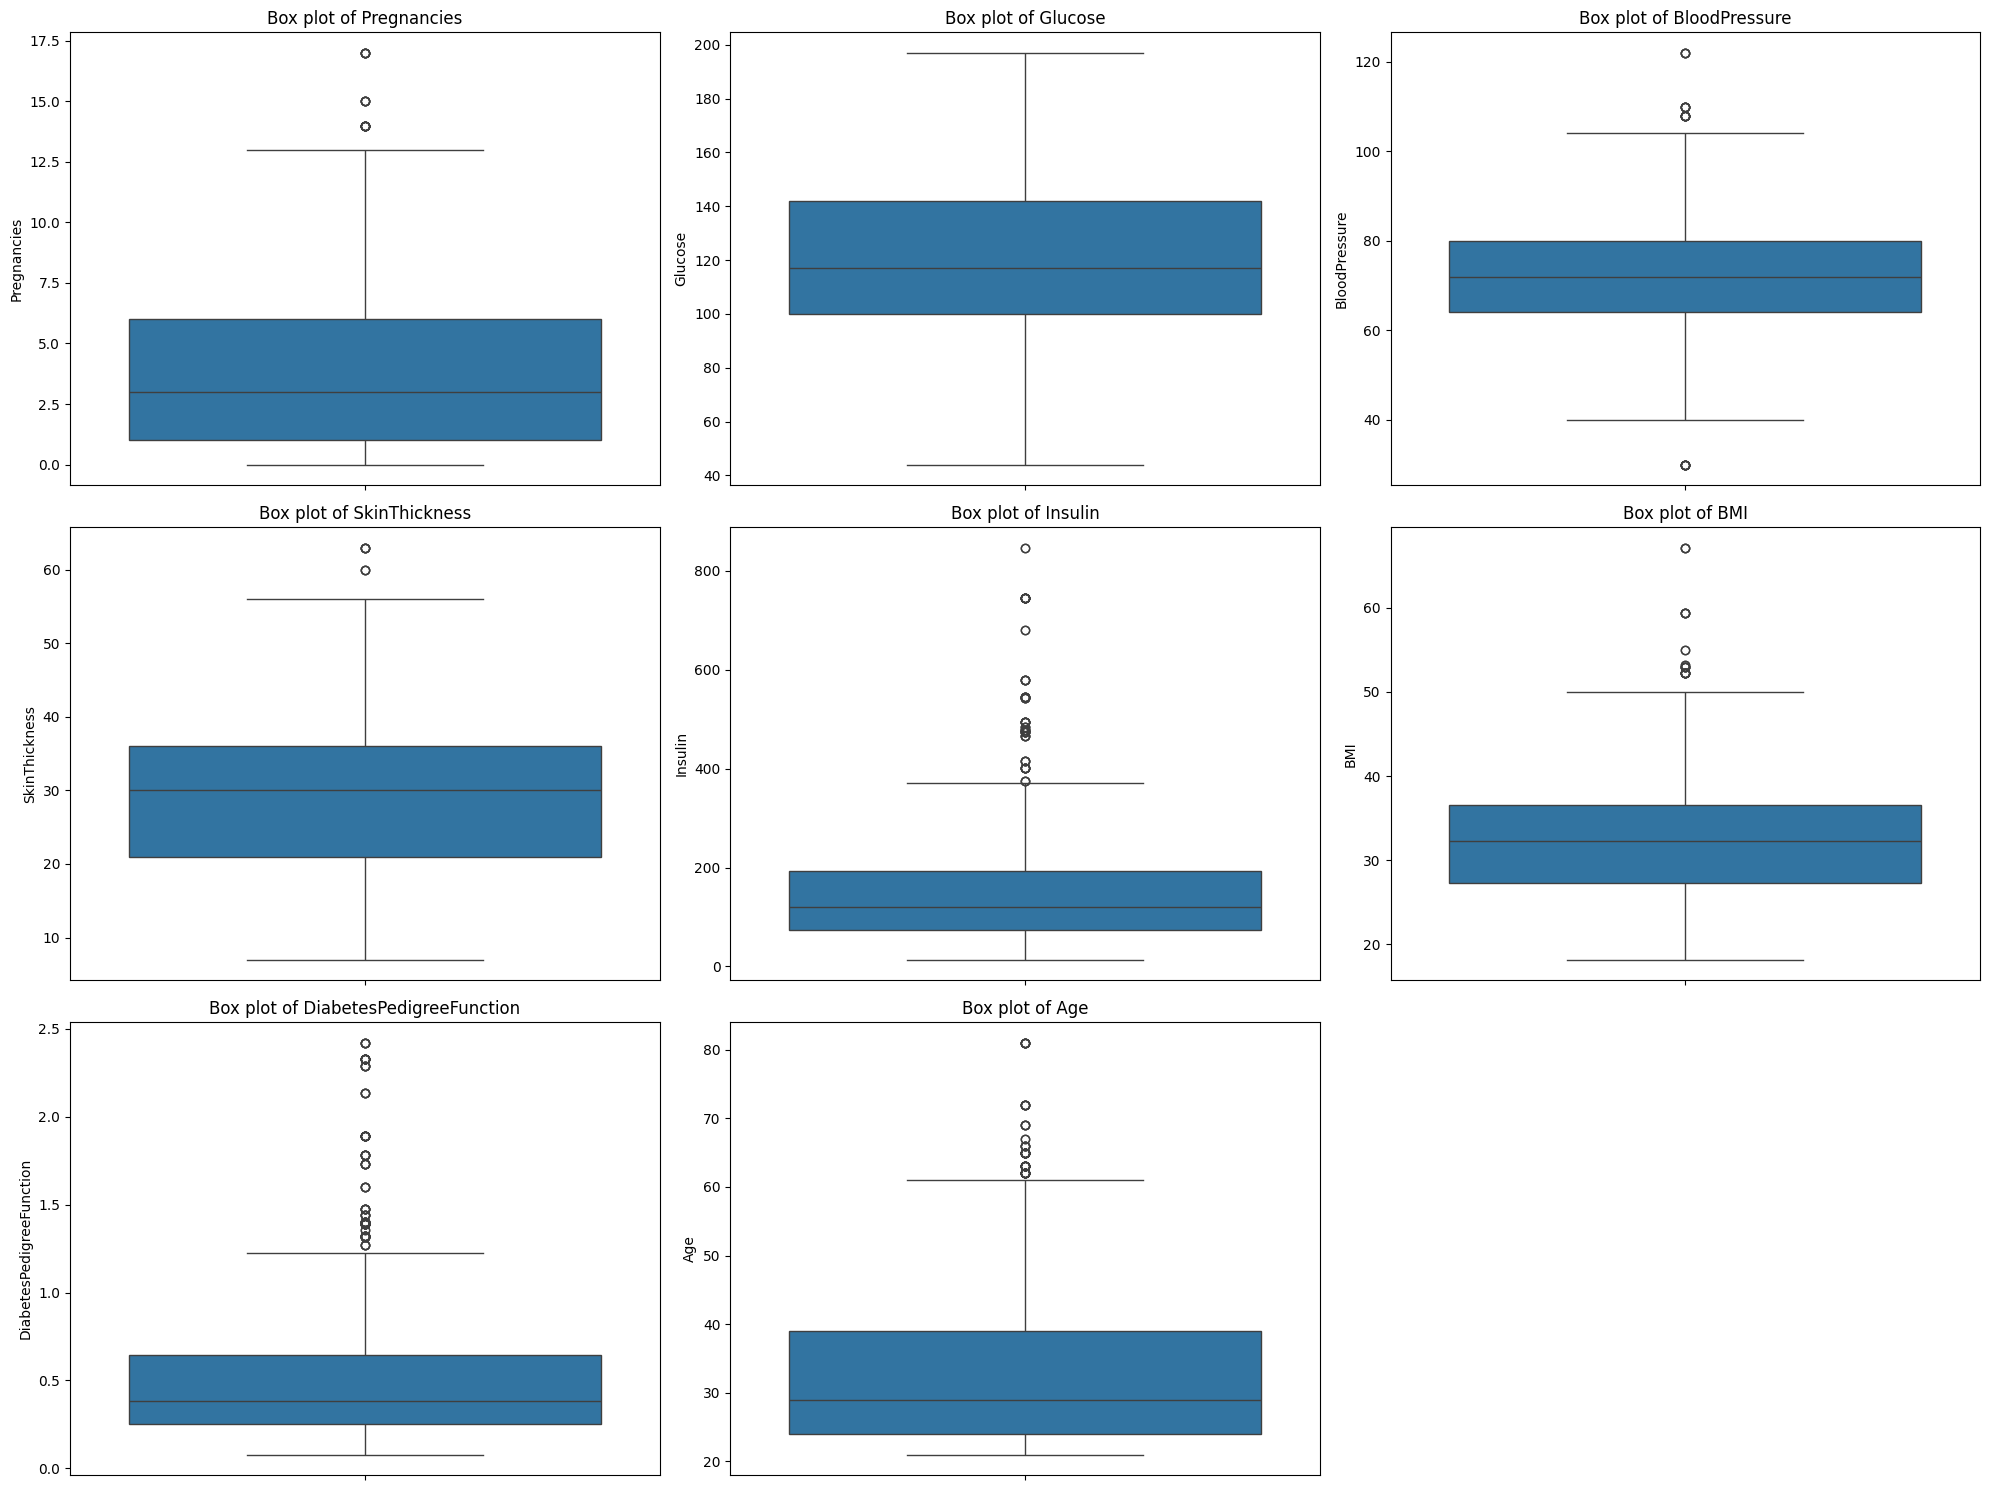

In [10]:
# Plot box plots for all numerical columns
plt.figure(figsize=(20, 15))

for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'Outcome' column
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

# Observations from the Box Plots

- **Pregnancies**:
    - A few outliers with values greater than 10.
    - Most values are concentrated below 10.
- **Glucose**:
    - A relatively symmetric distribution with a few outliers.
    - Most values lie between 90 and 160.
- **BloodPressure**:
    - Several outliers on both the higher and lower ends.
    - Majority of the values range between 60 and 90.
- **SkinThickness**:
    - A few outliers on the higher side.
    - Most values lie between 20 and 40.
- **Insulin**:
    - Numerous outliers, especially on the higher end.
    - Many values around zero, indicating possible missing data.
- **BMI**:
    - Several outliers on the higher end.
    - Most values lie between 25 and 40.
- **DiabetesPedigreeFunction**:
    - Numerous outliers on the higher end.
    - Majority of values lie below 1.
- **Age**:
    - Several outliers on the higher end.
    - Most values lie between 20 and 50.


## Correlation Matrix


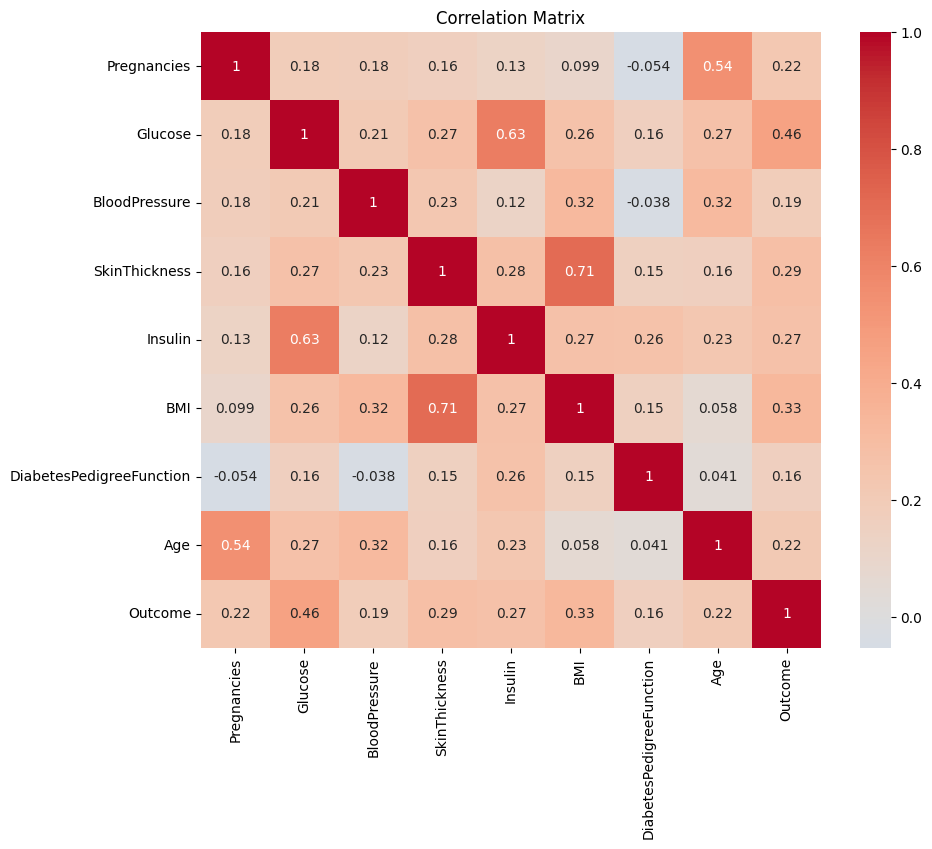

In [11]:
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Correlation Matrix Observations
1. **Strong Correlation:**
  - **SkinThickness and BMI**: There is a strong positive correlation between SkinThickness and BMI **(0.71)**. This indicates that individuals with higher skinfold thickness also tend to have higher BMI.
  - **Insulin and Glucose**: There is a strong positive correlation between Insulin and Glucose **(0.63)**. Higher insulin levels are associated with higher glucose levels.
2.**Moderate Correlation**:
  - **Glucose and Outcome**: There is a moderate positive correlation between Glucose and Outcome **(0.46)**. This suggests that higher glucose levels are associated with a higher likelihood of diabetes.
  - **Age and Pregnancies**: There is a moderate positive correlation between Age and Pregnancies **(0.54)**. This makes sense as older women are more likely to have had more pregnancies.
  - **Outcome and BMI**: There is a moderate positive correlation between Outcome and BMI **(0.33)**. Higher BMI is associated with a higher likelihood of diabetes.


### Visualizing the distribution of data

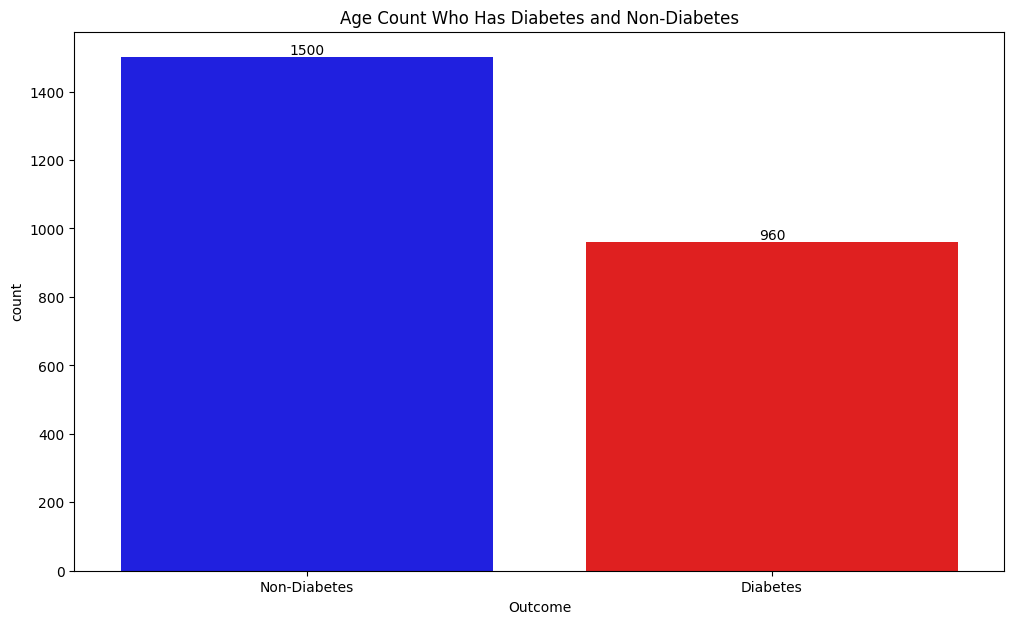

In [12]:
# Overview age count who has diabetes and non-diabetes
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='Outcome', data=df, palette=['blue', 'red'])
plt.title('Age Count Who Has Diabetes and Non-Diabetes')

# Define labels for the bars
labels = ['Non-Diabetes', 'Diabetes']

# Add count numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()-20),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
# Add labels underneath the graph
ax.set_xticks([0, 1])
ax.set_xticklabels(labels)

plt.show()


Comment: a higher count of non-diabetic individuals in the sample.

---



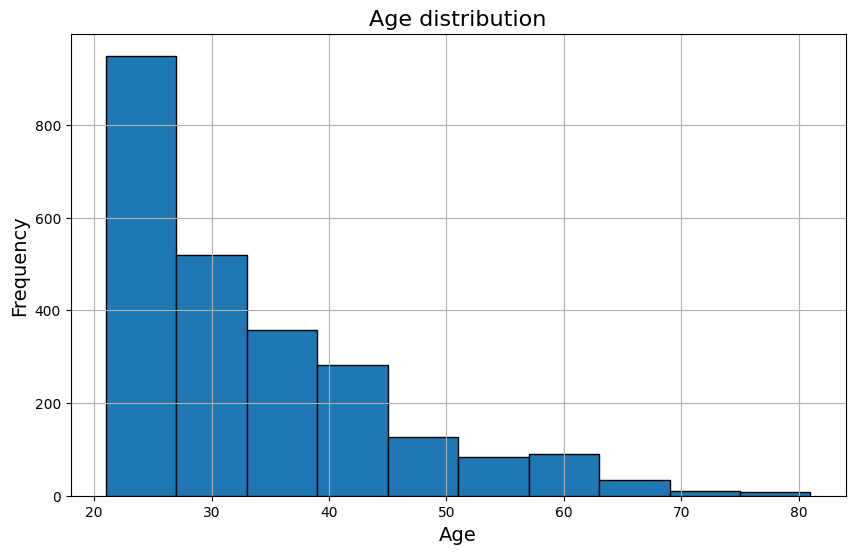

In [13]:
# Visualize the distribution of age
# plot the hist of the age variable
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age distribution', fontsize=16)

# Create histogram
df['Age'].hist(edgecolor='black')


plt.show()

The highest frequency occurs within the age range of 0-10, suggesting a relatively young population and ewer individuals in older age groups


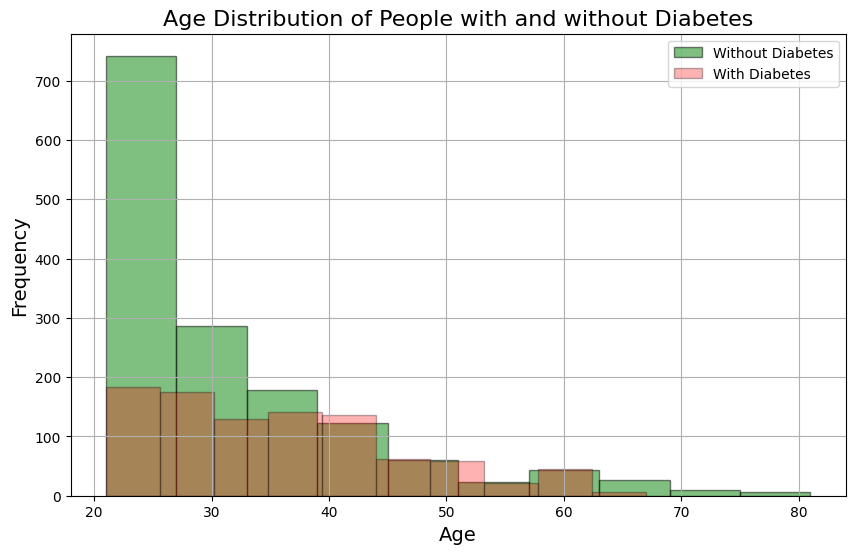

In [14]:
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age Distribution of People with and without Diabetes', fontsize=16)

# Plot histogram for people without diabetes
df[df['Outcome'] == 0]['Age'].hist(edgecolor='black', color='green', alpha=0.5, label='Without Diabetes')

# Plot histogram for people with diabetes
df[df['Outcome'] == 1]['Age'].hist(edgecolor='black', color='red', alpha=0.3, label='With Diabetes')

# Add a legend
plt.legend()

plt.show()

1. **With Diabetes:**
  - Well, the patients are in groups of about 21 to 45 years old, and most of them are 21 to 30 years old.
  - The highest frequency occurs within the age range between 20 and 30 -> indicates a relative young population has a higher chance of getting diabete than the rest of the population
2. **Without DiabeteS:**
  - We also see that the young group (20-30) has the highest frequency

=> Therefore, we can have a glimse that although the young group has the highest frequency but the chance they get the diabete maybe not the largest



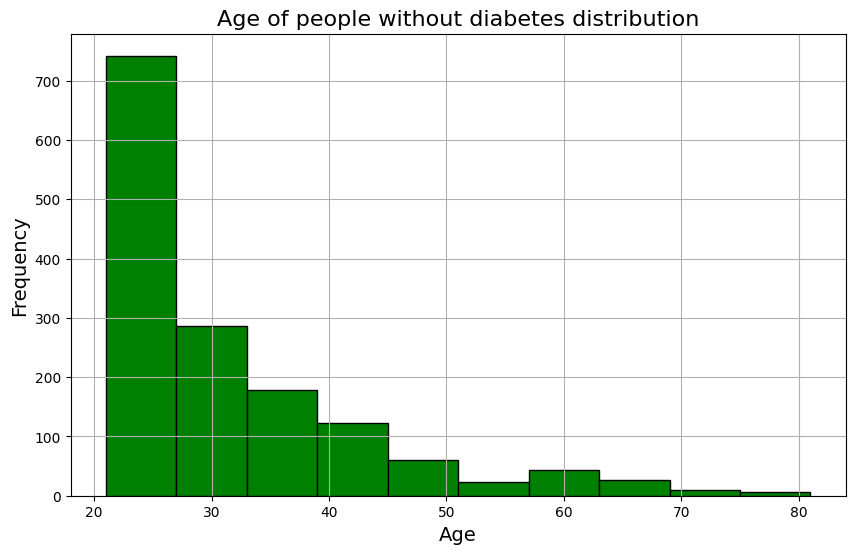

In [15]:
### Visualize the distribution of age of people without diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people without diabetes distribution', fontsize=16)

# Create histogram
df[df['Outcome'] == 0]['Age'].hist(edgecolor='black',color='green')


plt.show()

In this case, I want to use box plot to visualize the distribution of age and find out the outliers.

---



I want to find the relationship between **Insulin of diabetic patients** and **non diabetic patients**. However, we can see that there are many NaN values in Insulin and I find out the relationship between Insulin and Glucose. As a result, I will use Glucose to predict Insulin.

In [16]:
# Visualize using scatter for Insulin and Glucose
plt.figure(figsize=(10, 6))
plt.scatter(df_without_nana['Insulin'], df_without_nana['Glucose'], color='blue')
sns.regplot(x=df_without_nana['Insulin'], y=df_without_nana['Glucose'], data=df, color='blue', line_kws={'color': 'red'})
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Glucose', fontsize=14)
plt.title('Insulin vs Glucose', fontsize=16)
plt.show()

NameError: name 'df_without_nana' is not defined

<Figure size 1000x600 with 0 Axes>



> Well, I realize there are something stranger with Insulin. I will double check using box plot.


[Text(0, 0, 'Non-Diabetes'), Text(1, 0, 'Diabetes')]

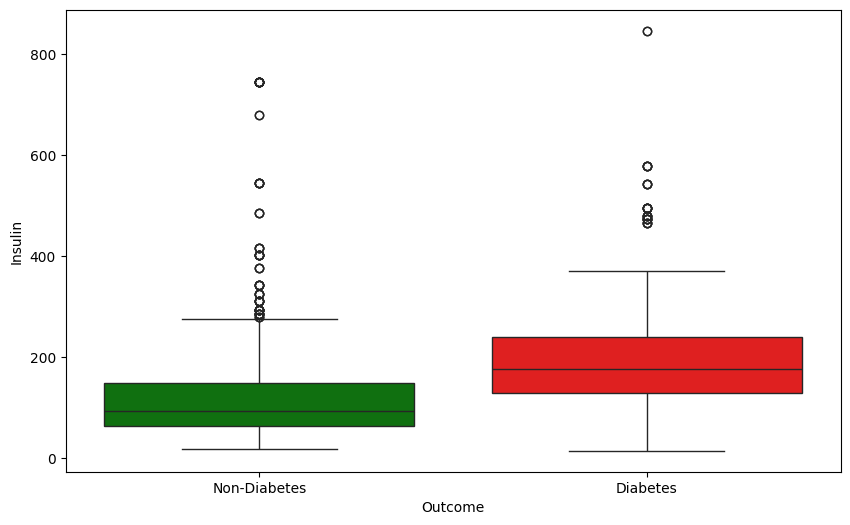

In [ ]:
# Insulin box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Outcome', y='Insulin', data=df_without_nana, palette=['green', 'red'])
# Define labels
labels = ['Non-Diabetes', 'Diabetes']

# Add labels underneath the graph
ax.set_xticks([0, 1])
ax.set_xticklabels(labels)

In [ ]:
# 5 number summary for Insulin of people with non- diabetes
df_without_nana[df['Outcome'] == 0]['Insulin'].describe()

count    801.000000
mean     130.159800
std      116.279091
min       18.000000
25%       63.000000
50%       92.000000
75%      148.000000
max      744.000000
Name: Insulin, dtype: float64

In [ ]:
# 5 number summary for Insulin of people with diabetes
df_without_nana[df['Outcome'] == 1]['Insulin'].describe()

count    467.000000
mean     197.404711
std      119.750156
min       14.000000
25%      129.000000
50%      175.000000
75%      240.000000
max      846.000000
Name: Insulin, dtype: float64

From research, I find out that:
- Insulin of normal people after consuming a glucose-rich drink is 16-166 mu U/ml
- the diabetes patients have Insulin level will be less than 180 mu U/ml.

Link: https://emedicine.medscape.com/article/2089224-overview?form=fpf

In [ ]:
# Find outliers for Insulin of people with non-diabetes
df_without_nana[(df['Outcome'] == 0) & (df['Insulin'] > 148)] # Find outliers


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
35,4,103.0,60.0,33.0,192.0,24.0,0.966,33,0
54,7,150.0,66.0,42.0,342.0,34.7,0.718,42,0
73,4,129.0,86.0,20.0,270.0,35.1,0.231,23,0
91,4,123.0,80.0,15.0,176.0,32.0,0.443,34,0
...,...,...,...,...,...,...,...,...,...
2432,4,147.0,74.0,25.0,293.0,34.9,0.385,30,0
2443,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
2445,2,108.0,62.0,10.0,278.0,25.3,0.881,22,0
2447,1,157.0,72.0,21.0,168.0,25.6,0.123,24,0


In [ ]:
# Dropout outliers
df_without_nana_outliers = df_without_nana[df['Outcome'] == 0][df_without_nana['Insulin'] < 148]

In [ ]:
# Without diabetes
# Group 1: 20 to 28
outliers_condition = (df_without_nana['Outcome'] == 0) & (df_without_nana['Age'] > 20) & (df_without_nana['Age'] < 28) & (df_without_nana['Insulin'] > 130)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(60, 94, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 28 to 90
outliers_condition = (df_without_nana['Outcome'] == 0) & (df_without_nana['Age'] >= 28) & (df_without_nana['Age'] < 90) & (df_without_nana['Insulin'] > 130)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(68, 114, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values


In [ ]:
# For people with diabetes
# Group 1: 21 to 35
outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Age'] >= 21) & (df_without_nana['Age'] < 35) & (df_without_nana['Insulin'] > 270)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(135, 220, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 35 to 80
outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Age'] >= 35) & (df_without_nana['Age'] <= 70) & (df_without_nana['Insulin'] > 270)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(135, 220, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

In [ ]:
# For people with diabetes
# Group 1: 21 to 35
outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Age'] >= 21) & (df_without_nana['Age'] < 35) & (df_without_nana['Insulin'] < 50)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(70, 120, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 35 to 80
outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Age'] >= 35) & (df_without_nana['Age'] <= 70) & (df_without_nana['Insulin'] < 50)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(70, 120, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

After filtering the outliers, double check the box plot of Insulin

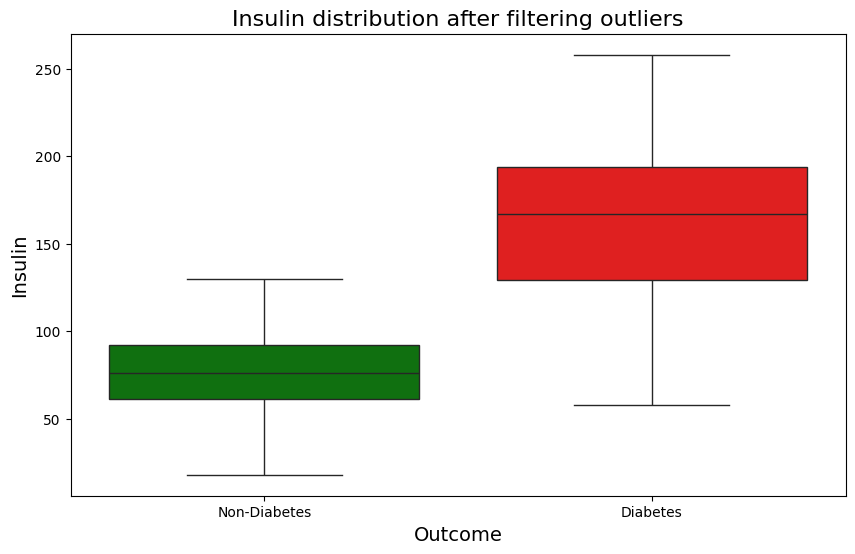

In [ ]:
# Insulin box plot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='Outcome', y='Insulin', data=df_without_nana, palette=['green', 'red']).set_xticklabels(labels)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Insulin', fontsize=14)
plt.title('Insulin distribution after filtering outliers', fontsize=16)

# Define labels
labels = ['Non-Diabetes', 'Diabetes']


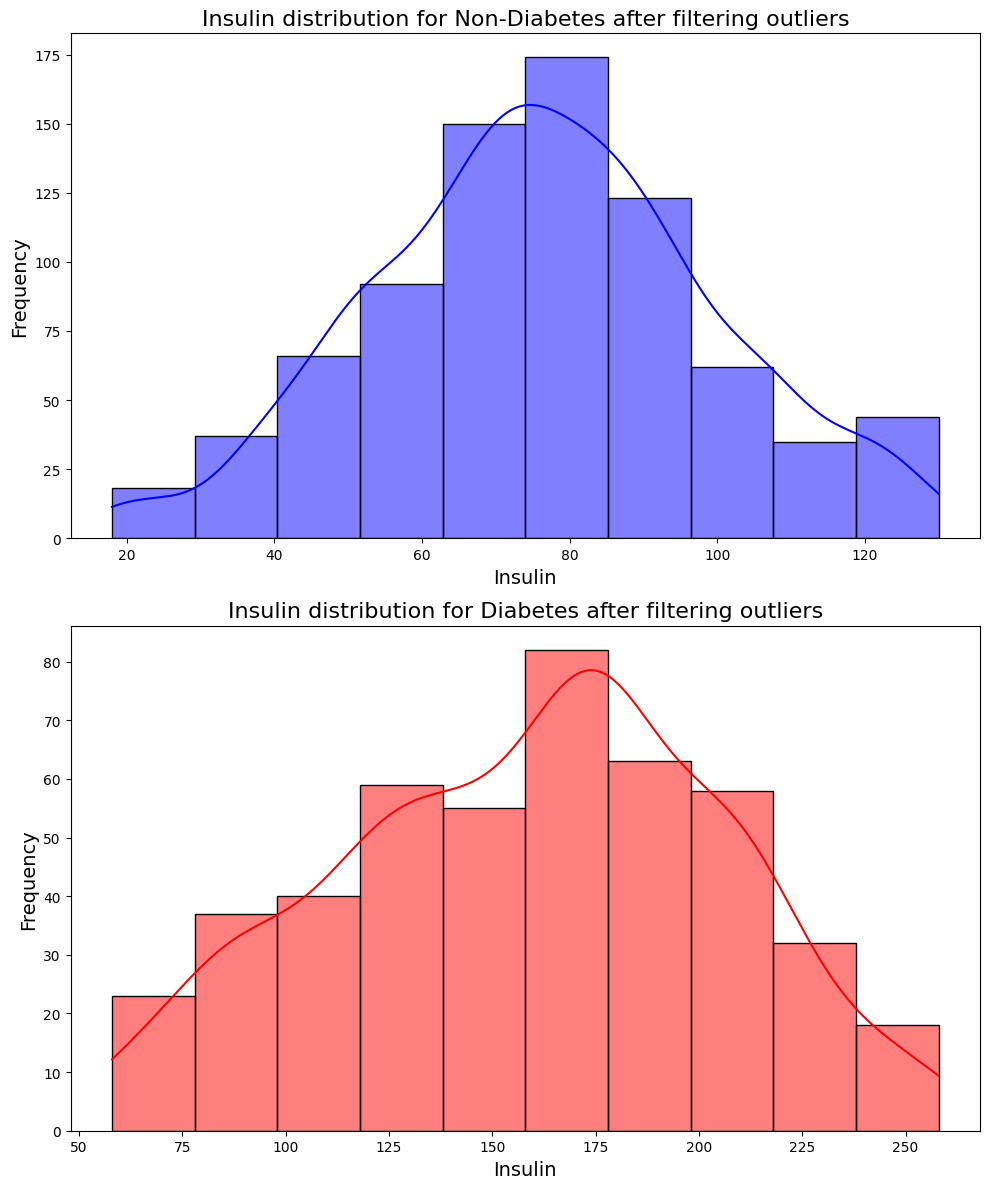

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Insulin distribution for Outcome=0
sns.histplot(data=df_without_nana[df_without_nana['Outcome'] == 0], x='Insulin', kde=True, color='blue', ax=axs[0], bins=10)
axs[0].set_title('Insulin distribution for Non-Diabetes after filtering outliers', fontsize=16)
axs[0].set_xlabel('Insulin', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=14)

# Insulin distribution for Outcome=1
sns.histplot(data=df_without_nana[df_without_nana['Outcome'] == 1], x='Insulin', kde=True, color='red', ax=axs[1],bins=10)
axs[1].set_title('Insulin distribution for Diabetes after filtering outliers', fontsize=16)
axs[1].set_xlabel('Insulin', fontsize=14)
axs[1].set_ylabel('Frequency', fontsize=14)


plt.tight_layout()

From the graph above, we can see here the highest frequency of insulin distribution of diabetic patient is at range 150 to 180 => This result is nearly as same as the research paper above

In [ ]:
df_without_nana[df_without_nana['Outcome'] == 1]['Insulin'].describe()

count    467.000000
mean     158.903640
std       46.551339
min       58.000000
25%      129.000000
50%      167.000000
75%      194.000000
max      258.000000
Name: Insulin, dtype: float64

In [ ]:
df_without_nana[df_without_nana['Outcome'] == 0]['Insulin'].describe()

count    801.000000
mean      76.310861
std       23.066090
min       18.000000
25%       61.000000
50%       76.000000
75%       92.000000
max      130.000000
Name: Insulin, dtype: float64

Well, fill with random values maybe not a good idea. I will use group of age to fill the missing values of Insulin.

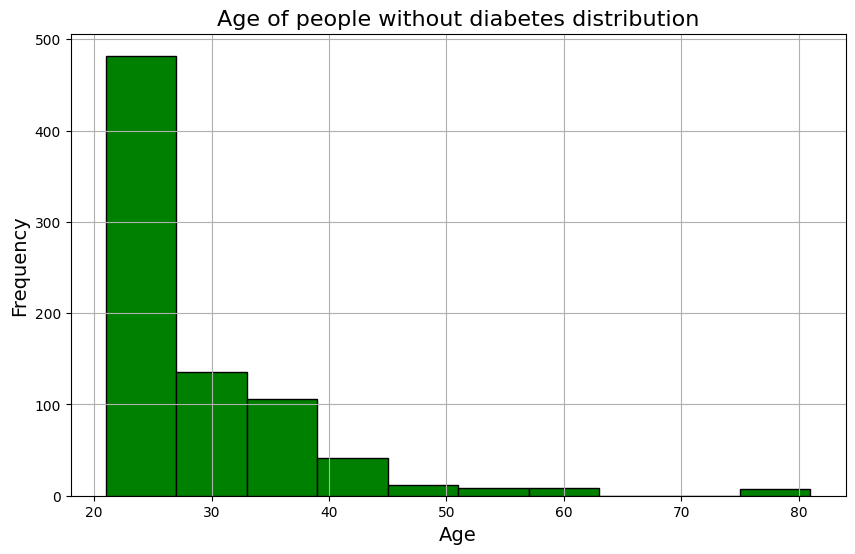

In [ ]:
### Visualize the distribution of age of people without diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people without diabetes distribution', fontsize=16)

# Create histogram
df_without_nana[df_without_nana['Outcome'] == 0]['Age'].hist(edgecolor='black',color='green')


plt.show()

In [ ]:
# Dropout outliers
df_without_nana_outliers = df_without_nana[df['Outcome'] == 0][df_without_nana['Insulin'] < 148]

Text(0.5, 1.0, 'Insulin vs Age')

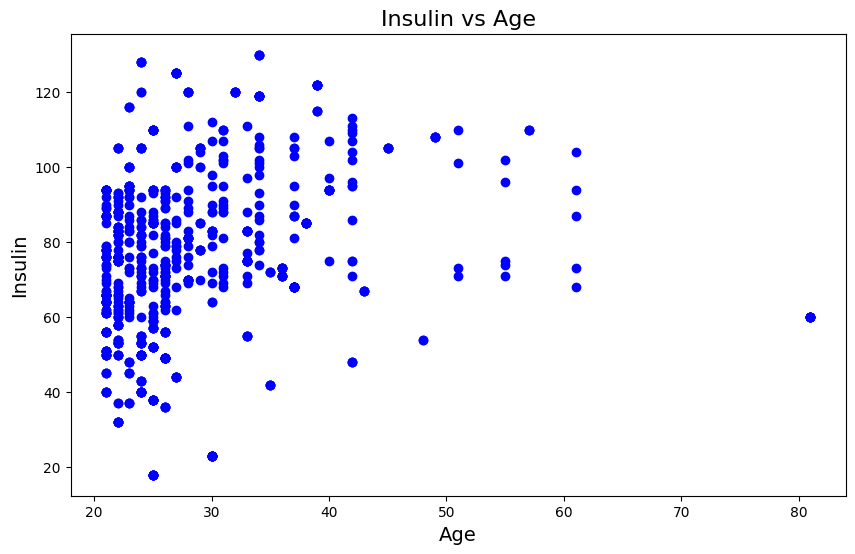

In [ ]:
# Scatter plot for Insulin and Age
plt.figure(figsize=(10, 6))
plt.scatter(df_without_nana_outliers['Age'], df_without_nana_outliers['Insulin'], color='blue')
plt.ylabel('Insulin', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Insulin vs Age', fontsize=16)

From the graph above, we can clearly see that the age is seperated into 2 groups: less than or euqal to 28 (nearly 30) and bigger than that

In [ ]:
# Split age into 2 groups
# Group 1: 20 to 28 and compute 5 number summary
group1 = df_without_nana_outliers[(df_without_nana_outliers['Age'] >= 20) & (df_without_nana_outliers['Age'] <= 28)]
group1['Insulin'].describe()

count    546.000000
mean      72.078755
std       21.571371
min       18.000000
25%       56.000000
50%       72.000000
75%       86.750000
max      128.000000
Name: Insulin, dtype: float64

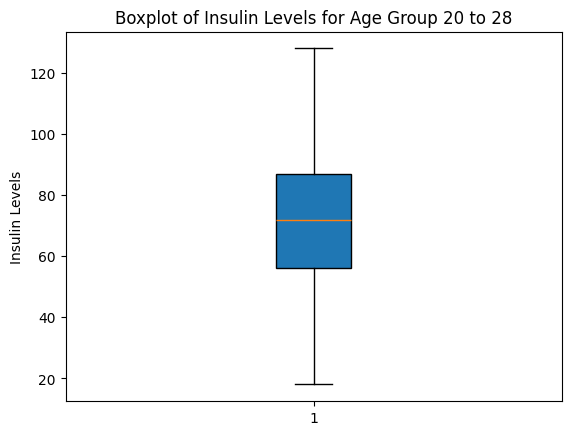

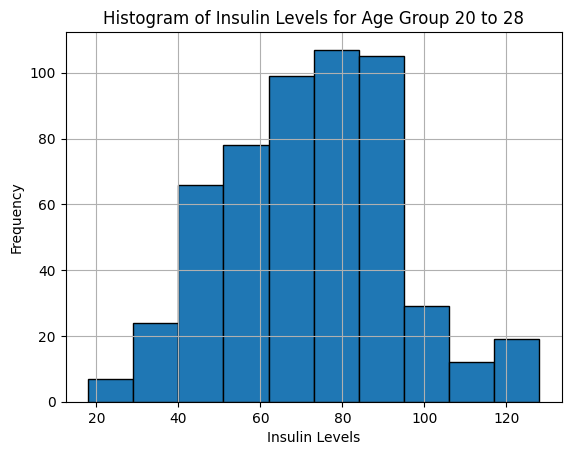

In [ ]:
# Create a boxplot with color
fig, ax = plt.subplots()
box = ax.boxplot(group1['Insulin'], patch_artist=True)

# Adding colors to the boxplot
colors = ['#1f77b4']  # Blue color for the boxplot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Display the boxplot
plt.title('Boxplot of Insulin Levels for Age Group 20 to 28')
plt.ylabel('Insulin Levels')
plt.show()

# Create a histogram
group1.hist(column='Insulin', bins=10, color='#1f77b4', edgecolor='black')
plt.title('Histogram of Insulin Levels for Age Group 20 to 28')
plt.xlabel('Insulin Levels')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Group 2: 28 to 90 and compute 5 number summary
group2 = df_without_nana_outliers[(df_without_nana_outliers['Age'] > 28) & (df_without_nana_outliers['Age'] <= 90)]
group2['Insulin'].describe()


count    255.000000
mean      85.372549
std       23.587299
min       23.000000
25%       71.000000
50%       85.000000
75%      105.000000
max      130.000000
Name: Insulin, dtype: float64

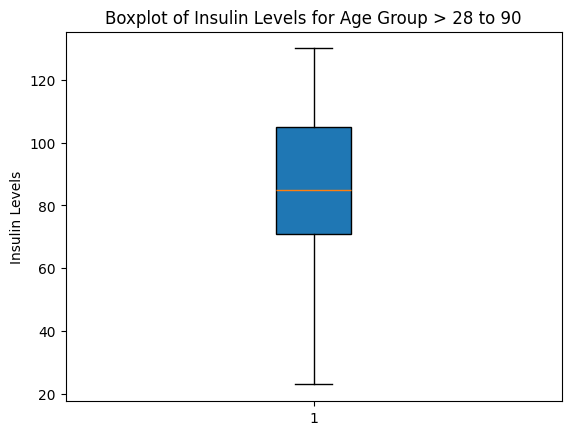

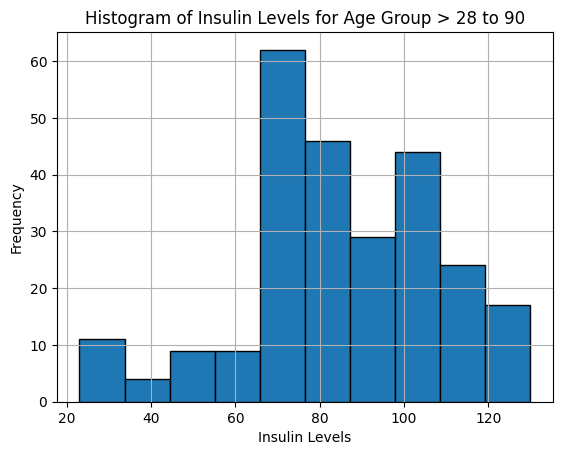

In [ ]:
# Create a boxplot with color for group 2
fig, ax = plt.subplots()
box = ax.boxplot(group2['Insulin'], patch_artist=True)

# Adding colors to the boxplot
colors = ['#1f77b4']  # Blue color for the boxplot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Display the boxplot
plt.title('Boxplot of Insulin Levels for Age Group > 28 to 90')
plt.ylabel('Insulin Levels')
plt.show()

# Create a histogram for group 2
group2.hist(column='Insulin', bins=10, color='#1f77b4', edgecolor='black')
plt.title('Histogram of Insulin Levels for Age Group > 28 to 90')
plt.xlabel('Insulin Levels')
plt.ylabel('Frequency')
plt.show()

Fill outliners with random values from 25th percentile to 75th percentile of Insulin for group 1

In [ ]:
# Without diabetes
# Group 1: 20 to 28
outliers_condition = (df_without_nana['Outcome'] == 0) & (df_without_nana['Age'] > 20) & (df_without_nana['Age'] < 28) & (df_without_nana['Insulin'] > 130)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(60, 94, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 28 to 90
outliers_condition = (df_without_nana['Outcome'] == 0) & (df_without_nana['Age'] >= 28) & (df_without_nana['Age'] < 90) & (df_without_nana['Insulin'] > 130)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(68, 114, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

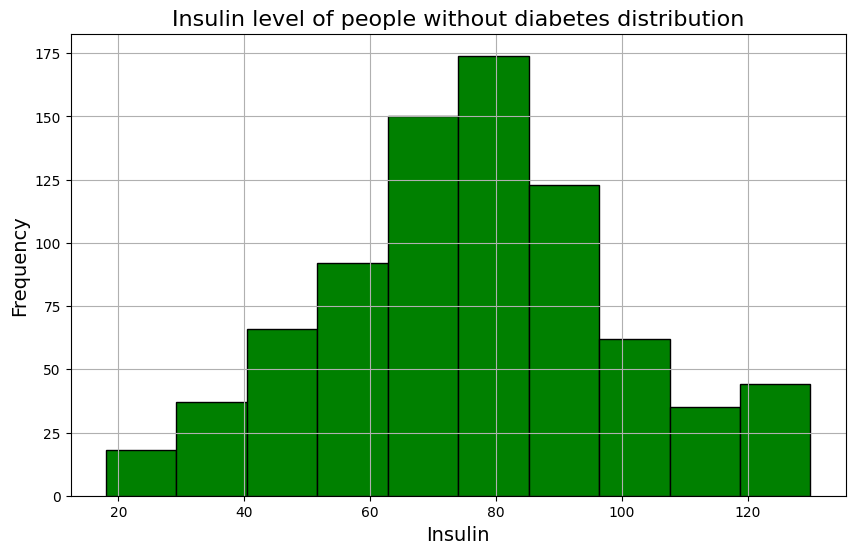

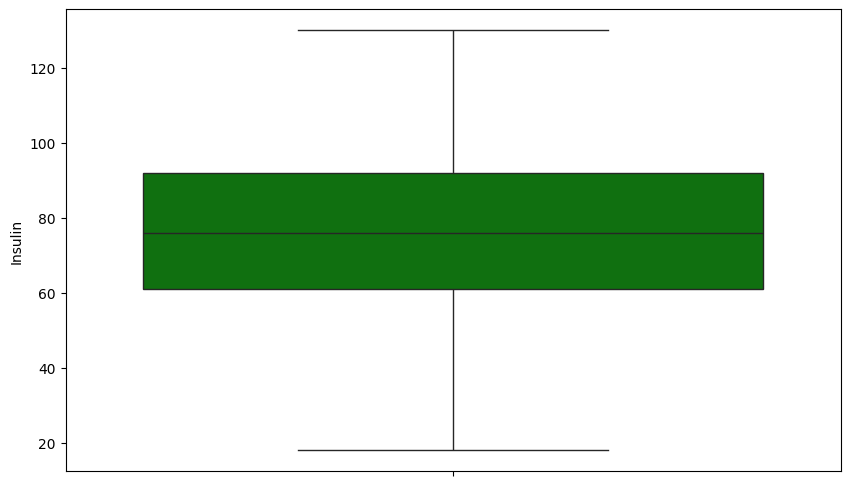

In [ ]:
# Visualize the distribution of insulin of people without diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Insulin level of people without diabetes distribution', fontsize=16)

# Create histogram
df_without_nana[df_without_nana['Outcome'] == 0]['Insulin'].hist(edgecolor='black',color='green', bins = 10)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_without_nana[df_without_nana['Outcome'] == 0]['Insulin'], color='green')
plt.show()

Text(0.5, 1.0, 'Q-Q plot for Insulin of people without diabetes')

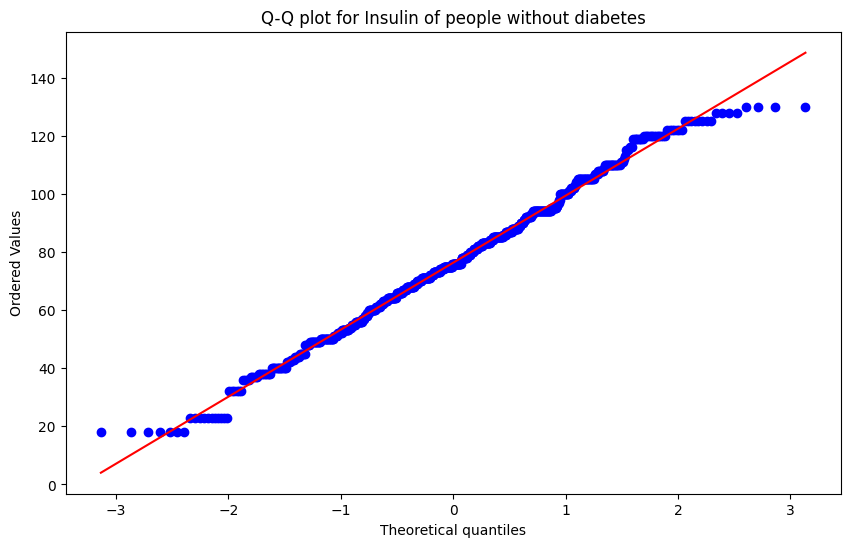

In [ ]:
# qq plot for Insulin of people without diabetes


plt.figure(figsize=(10, 6))
stats.probplot(df_without_nana[df_without_nana['Outcome'] == 0]['Insulin'], dist="norm", plot=plt)
plt.title('Q-Q plot for Insulin of people without diabetes')

Well, we can see that fill outliners with random values from 25th percentile to 75th percentile of Insulin for group 1 is a good idea. With qq plot, we can see that the distribution of Insulin is nearly normal, and we will assume that the distribution of Insulin is normal.

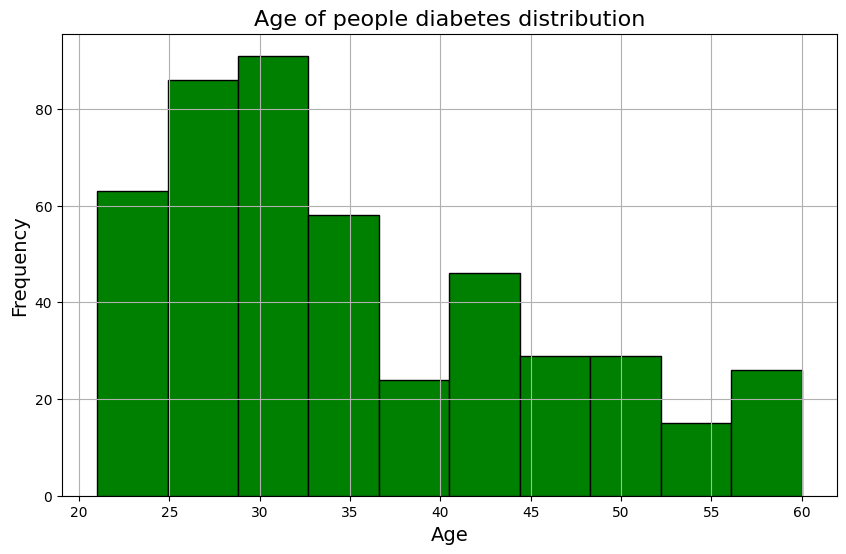

In [ ]:

### Visualize the distribution of age of people diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people diabetes distribution', fontsize=16)

# Create histogram
df_without_nana[df_without_nana['Outcome'] == 1]['Age'].hist(edgecolor='black',color='green')


plt.show()

In [ ]:
# Dropout outliers
df_without_nana_outliers = df_without_nana[(df_without_nana['Outcome'] == 0) & (df_without_nana['Insulin'] < 300) & (df_without_nana['Insulin'] > 80)]

Text(0.5, 1.0, 'Insulin vs Age')

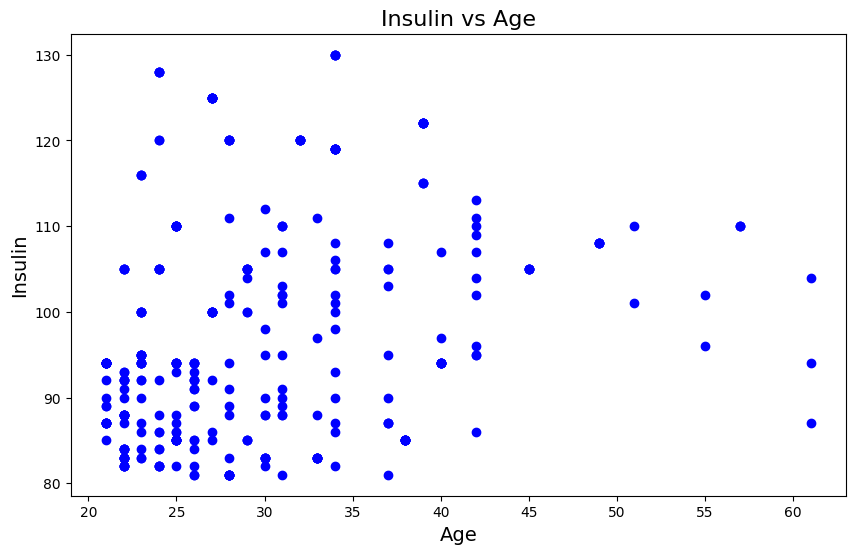

In [ ]:
# Scatter plot for Insulin and Age
plt.figure(figsize=(10, 6))
plt.scatter(df_without_nana_outliers['Age'], df_without_nana_outliers['Insulin'], color='blue')
plt.ylabel('Insulin', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Insulin vs Age', fontsize=16)

I will divide 2 groups of age: group 1 (21 to 35) and group 2 (35 to 65)

In [ ]:
group1 = df_without_nana_outliers[(df_without_nana_outliers['Age'] >= 20) & (df_without_nana_outliers['Age'] < 35)]
group1['Insulin'].describe()

count    274.000000
mean      96.543796
std       13.347699
min       81.000000
25%       85.250000
50%       94.000000
75%      105.000000
max      130.000000
Name: Insulin, dtype: float64

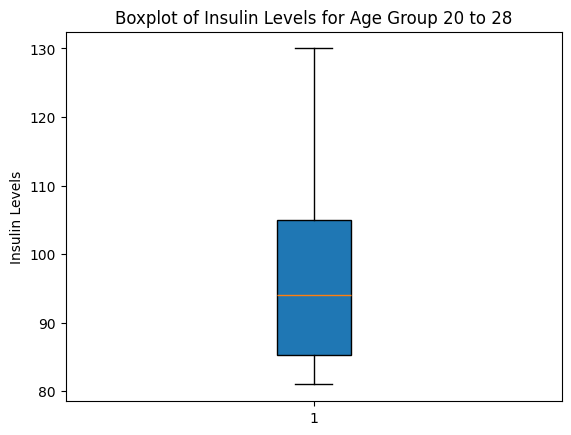

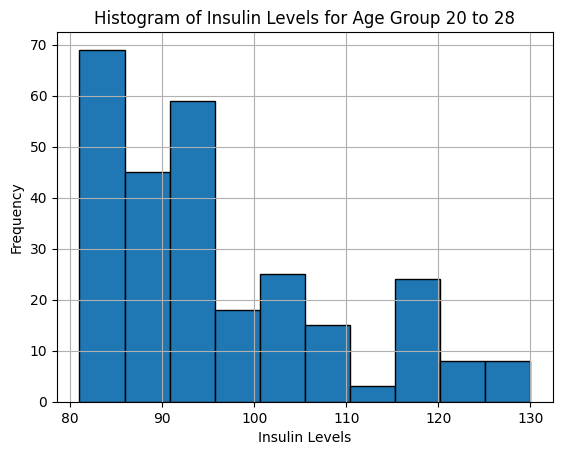

In [ ]:
# Create a boxplot with color
fig, ax = plt.subplots()
box = ax.boxplot(group1['Insulin'], patch_artist=True)

# Adding colors to the boxplot
colors = ['#1f77b4']  # Blue color for the boxplot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Display the boxplot
plt.title('Boxplot of Insulin Levels for Age Group 20 to 28')
plt.ylabel('Insulin Levels')
plt.show()

# Create a histogram
group1.hist(column='Insulin', bins=10, color='#1f77b4', edgecolor='black')
plt.title('Histogram of Insulin Levels for Age Group 20 to 28')
plt.xlabel('Insulin Levels')
plt.ylabel('Frequency')
plt.show()

In [ ]:
group2 = df_without_nana_outliers[(df_without_nana_outliers['Age'] >= 35) & (df_without_nana_outliers['Age'] <= 70)]
group2['Insulin'].describe()

count     69.000000
mean     101.318841
std       11.683942
min       81.000000
25%       94.000000
50%      104.000000
75%      109.000000
max      122.000000
Name: Insulin, dtype: float64

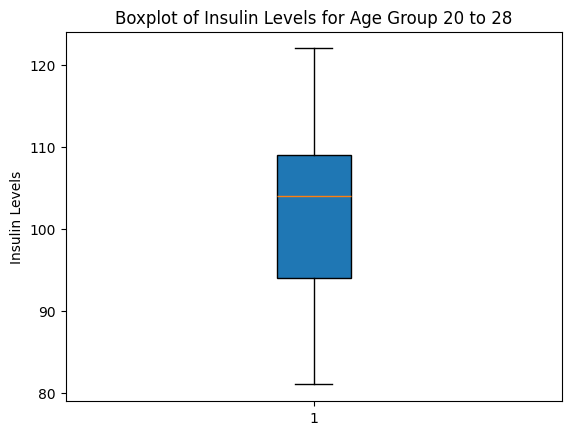

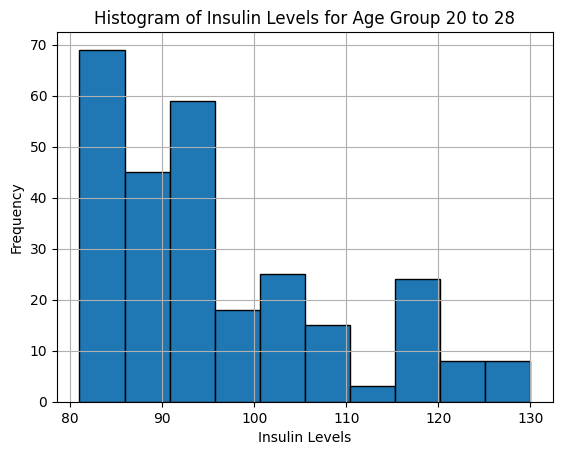

In [ ]:
# Create a boxplot with color
fig, ax = plt.subplots()
box = ax.boxplot(group2['Insulin'], patch_artist=True)

# Adding colors to the boxplot
colors = ['#1f77b4']  # Blue color for the boxplot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Display the boxplot
plt.title('Boxplot of Insulin Levels for Age Group 20 to 28')
plt.ylabel('Insulin Levels')
plt.show()

# Create a histogram
group1.hist(column='Insulin', bins=10, color='#1f77b4', edgecolor='black')
plt.title('Histogram of Insulin Levels for Age Group 20 to 28')
plt.xlabel('Insulin Levels')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# With diabetes
# Group 1: 21 to 35
outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Age'] >= 21) & (df_without_nana['Age'] < 35) & (df_without_nana['Insulin'] > 270)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(105, 130, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 35 to 80
outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Age'] >= 35) & (df_without_nana['Age'] <= 70) & (df_without_nana['Insulin'] > 270)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(100, 123, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

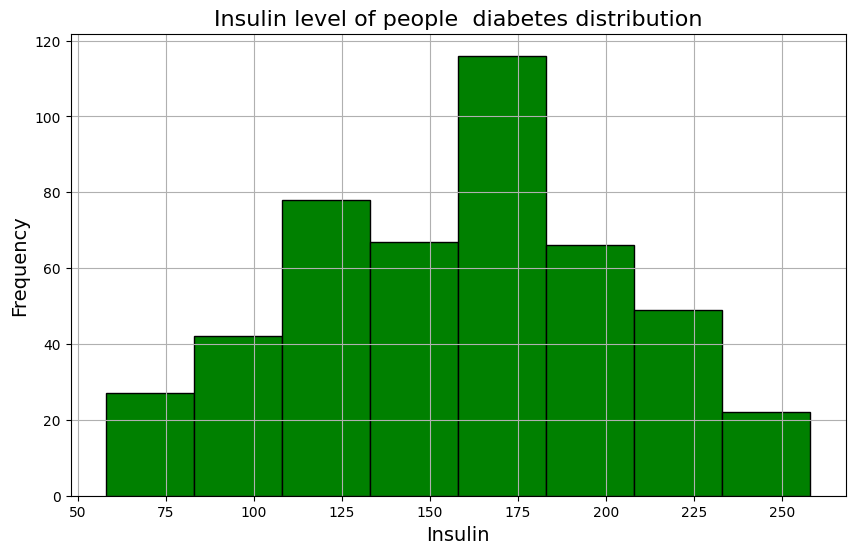

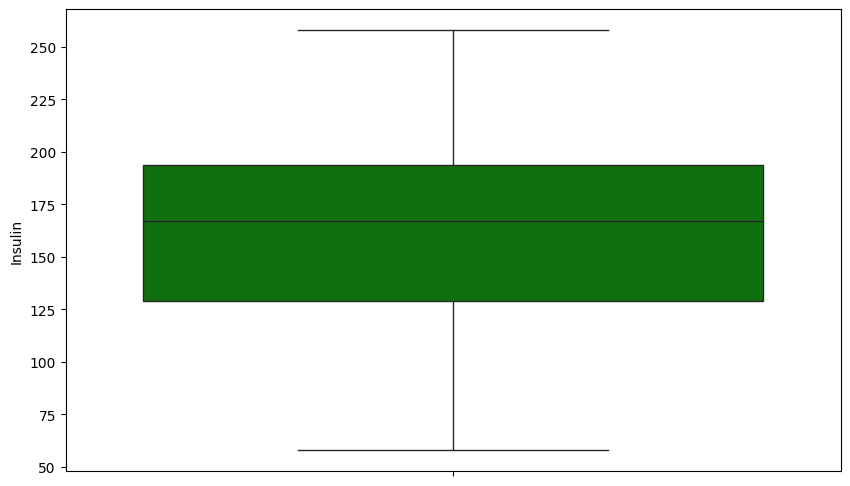

In [ ]:
# Visualize the distribution of insulin of people with diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Insulin level of people  diabetes distribution', fontsize=16)

# Create histogram
df_without_nana[df_without_nana['Outcome'] == 1]['Insulin'].hist(edgecolor='black',color='green', bins = 8)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_without_nana[df_without_nana['Outcome'] == 1]['Insulin'], color='green')
plt.show()

Text(0.5, 1.0, 'Q-Q plot for Insulin of people with diabetes')

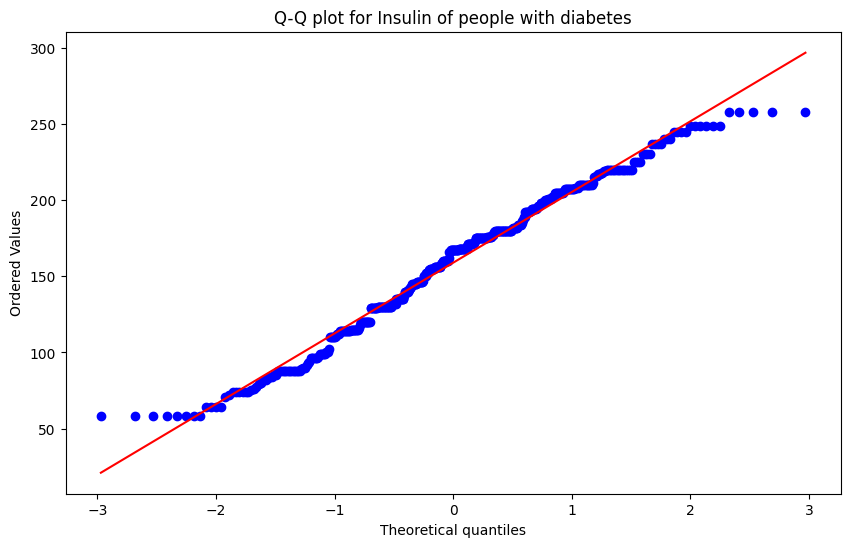

In [ ]:
# qq plot for Insulin of people without diabetes

plt.figure(figsize=(10, 6))
stats.probplot(df_without_nana[df_without_nana['Outcome'] == 1]['Insulin'], dist="norm", plot=plt)
plt.title('Q-Q plot for Insulin of people with diabetes')

Done with fill outliners of Insulin and next we will deal with NaN with same method.

## Fill NaN values of Insulin

In [ ]:
df.update(df_without_nana)

In [ ]:
df[df['Outcome']==1]['Insulin'].describe()

count    467.000000
mean     158.903640
std       46.551339
min       58.000000
25%      129.000000
50%      167.000000
75%      194.000000
max      258.000000
Name: Insulin, dtype: float64

In [ ]:
df.isna().sum()

Pregnancies                    0
Glucose                       17
BloodPressure                114
SkinThickness                717
Insulin                     1181
BMI                           31
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

In [ ]:
# Fill Glucose with mean
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)

In [ ]:
# Correlation between Glucose and Insulin
df[['Glucose', 'Insulin']].corr()

,Glucose,Insulin
Glucose,1.000000,0.558861
Insulin,0.558861,1.000000


In [ ]:
## Find data when insulin is missing
df[df['Insulin'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
2446,1,97.0,70.0,15.0,NaN,18.2,0.147,21,0
2451,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
2453,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
2454,2,99.0,NaN,NaN,NaN,22.2,0.108,23,0


In [ ]:
# Find data when Outcome is 0 and Insulin is missing
df[(df['Outcome'] == 0) & (df['Insulin'].isna())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
12,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
2437,8,95.0,72.0,NaN,NaN,36.8,0.485,57,0
2440,4,97.0,60.0,23.0,NaN,28.2,0.443,22,0
2446,1,97.0,70.0,15.0,NaN,18.2,0.147,21,0
2451,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


<Axes: title={'center': 'Age of people with non-diabetes and insulin is missing distribution'}, xlabel='Age', ylabel='Frequency'>

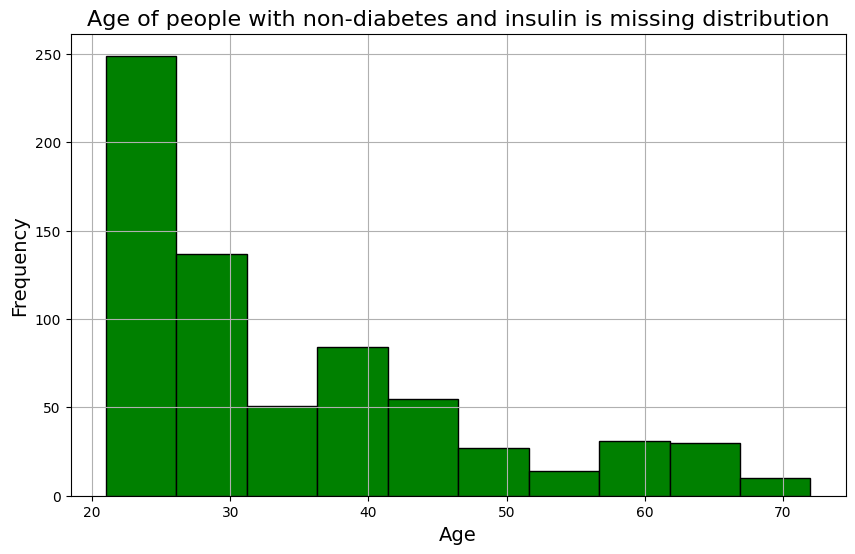

In [ ]:
# Visualize the distribution of Age of people with non-diabetes and insulin is missing
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people with non-diabetes and insulin is missing distribution', fontsize=16)

# Create histogram
df[(df['Outcome'] == 0) & (df['Insulin'].isna())]['Age'].hist(edgecolor='black',color='green', bins = 10)

I will fill NaN values of Insulin with random values from 25th percentile to 75th percentile of Insulin for group 1 and group 2. (same method with fill outliners)

---

In [ ]:
# Without diabetes
# Group 1: 20 to 28
outliers_condition = (df['Outcome'] == 0) & (df['Age'] > 20) & (df['Age'] < 28) & (df['Insulin'].isna())
num_outliers = outliers_condition.sum()
random_values = np.random.randint(60, 94, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 28 to 90
outliers_condition = (df['Outcome'] == 0) & (df['Age'] >= 28) & (df['Age'] < 90) & (df['Insulin'].isna())
num_outliers = outliers_condition.sum()
random_values = np.random.randint(68, 114, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

In [ ]:
# Find data when Outcome is 1 and Insulin is missing
df[(df['Outcome'] == 1) & (df['Insulin'].isna())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
11,10,168.0,74.0,NaN,NaN,38.0,0.537,34,1
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1
...,...,...,...,...,...,...,...,...,...
2436,0,131.0,88.0,NaN,NaN,31.6,0.743,32,1
2439,13,126.0,90.0,NaN,NaN,43.4,0.583,42,1
2441,0,131.0,66.0,40.0,NaN,34.3,0.196,22,1
2453,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


<Axes: title={'center': 'Age of people with diabetes and insulin is missing distribution'}, xlabel='Age', ylabel='Frequency'>

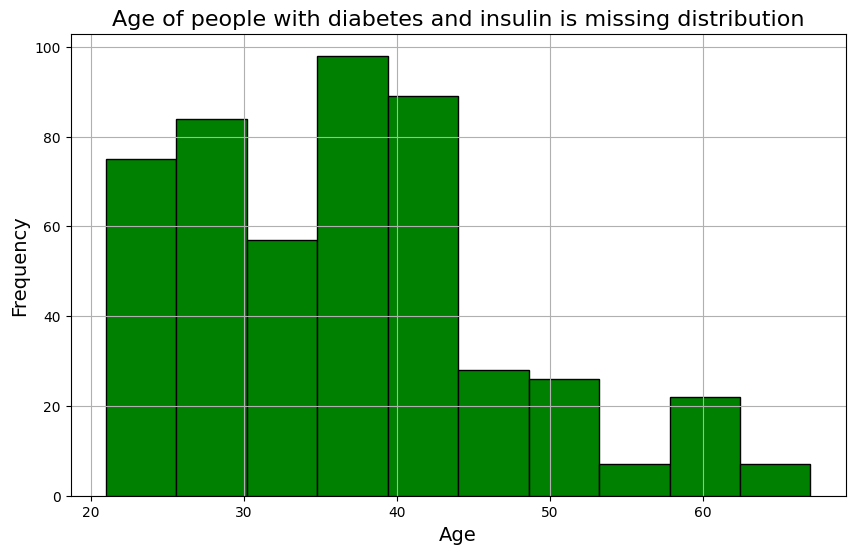

In [ ]:
# Visualize the distribution of Age of people with non-diabetes and insulin is missing
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people with diabetes and insulin is missing distribution', fontsize=16)

# Create histogram
df[(df['Outcome'] == 1) & (df['Insulin'].isna())]['Age'].hist(edgecolor='black',color='green', bins = 10)

In [ ]:
# Without diabetes
# Group 1: 21 to 35
outliers_condition = (df['Outcome'] == 0) & (df['Age'] >= 21) & (df['Age'] < 35) & (df['Insulin'].isna())
num_outliers = outliers_condition.sum()
random_values = np.random.randint(60, 90, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 35 to 80
outliers_condition = (df['Outcome'] == 0) & (df['Age'] >= 35) & (df['Age'] <= 80) & (df['Insulin'].isna())
num_outliers = outliers_condition.sum()
random_values = np.random.randint(60, 90, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

In [ ]:
# With diabetes
# Group 1: 21 to 35
outliers_condition = (df['Outcome'] == 1) & (df['Age'] >= 21) & (df['Age'] < 35) & (df['Insulin'].isna())
num_outliers = outliers_condition.sum()
random_values = np.random.randint(125, 200, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 35 to 80
outliers_condition = (df['Outcome'] == 1) & (df['Age'] >= 35) & (df['Age'] <= 80) & (df['Insulin'].isna())
num_outliers = outliers_condition.sum()
random_values = np.random.randint(125, 200, size=num_outliers)
df.loc[outliers_condition, 'Insulin'] = random_values

<Axes: xlabel='Outcome', ylabel='Insulin'>

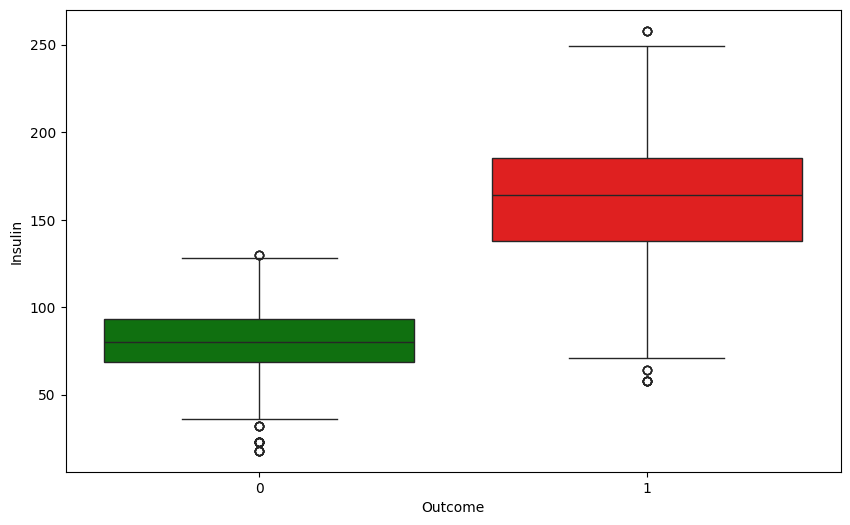

In [ ]:
# Box plot for Insulin
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df, palette=['green', 'red'])


<Axes: title={'center': 'Insulin distribution of people without diabetes'}, xlabel='Insulin', ylabel='Frequency'>

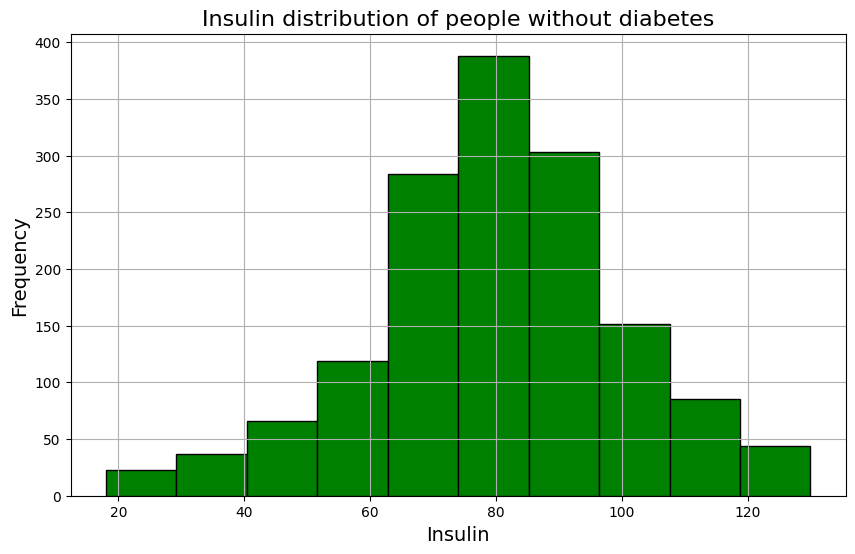

In [ ]:
# Plot histogram of Insulin in non-diabetes 
plt.figure(figsize=(10, 6))
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Insulin distribution of people without diabetes', fontsize=16)

# Create histogram
df[df['Outcome'] == 0]['Insulin'].hist(edgecolor='black',color='green')

<Axes: title={'center': 'Insulin distribution of people diabetes'}, xlabel='Insulin', ylabel='Frequency'>

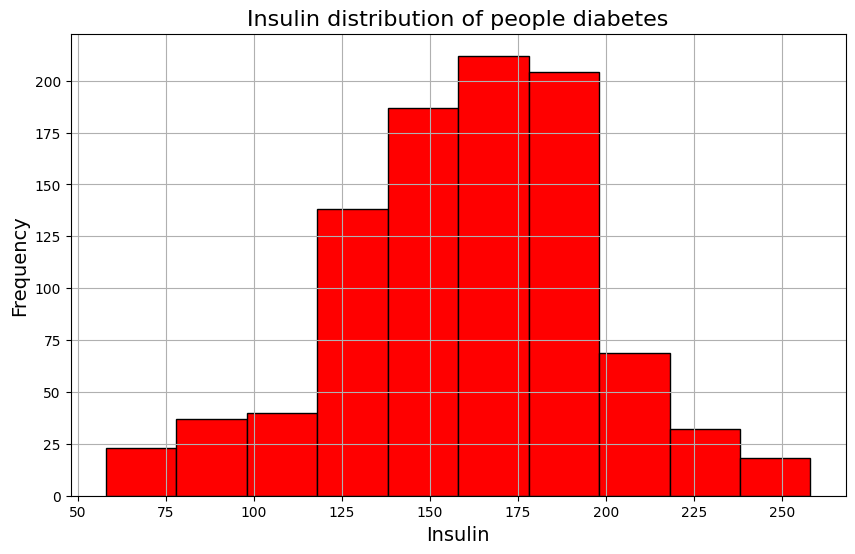

In [ ]:
# Plot histogram of Insulin in non-diabetes 
plt.figure(figsize=(10, 6))
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Insulin distribution of people diabetes', fontsize=16)

# Create histogram
df[df['Outcome'] == 1]['Insulin'].hist(edgecolor='black',color='red')

Text(0.5, 1.0, 'Q-Q plot for Insulin of non-diabetes')

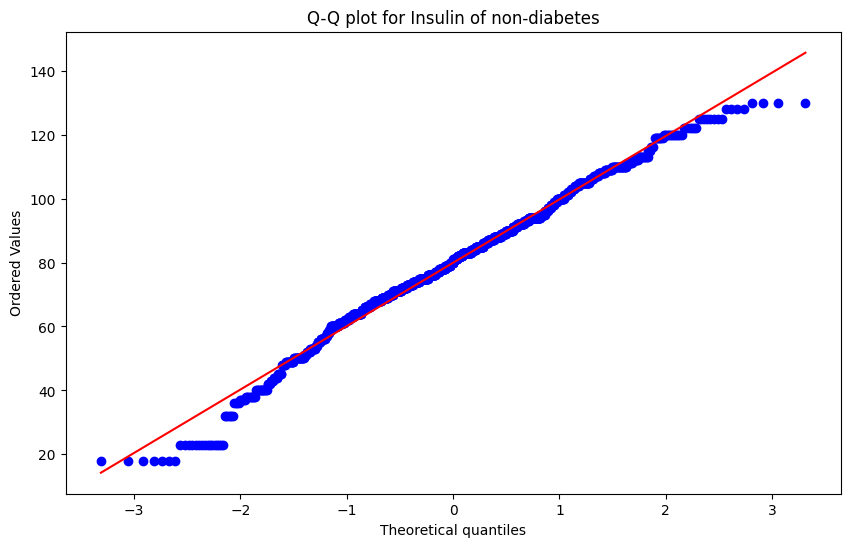

In [ ]:
## qq plot for Insulin of non-diabetes
plt.figure(figsize=(10, 6))
stats.probplot(df[df['Outcome']==0]['Insulin'], dist="norm", plot=plt)
plt.title('Q-Q plot for Insulin of non-diabetes')

Text(0.5, 1.0, 'Q-Q plot for Insulin of diabetes')

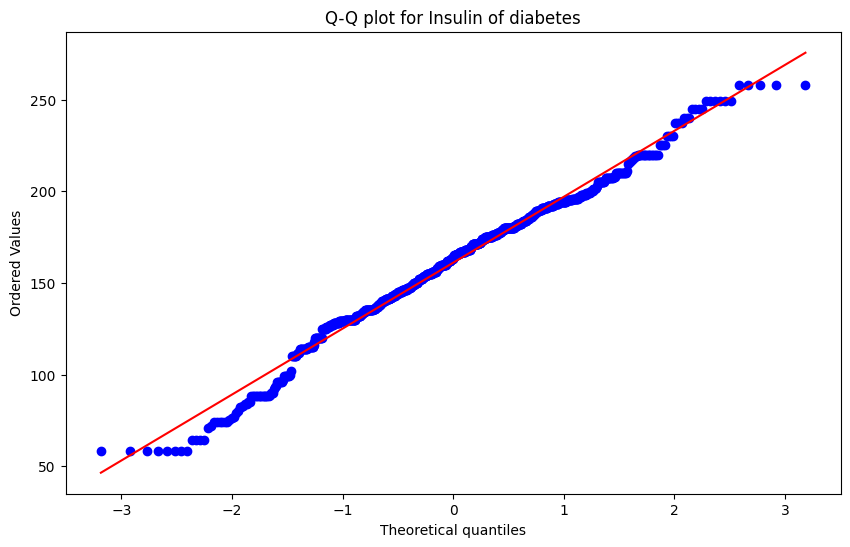

In [ ]:
## qq plot for Insulin of diabetes
plt.figure(figsize=(10, 6))
stats.probplot(df[df['Outcome']==1]['Insulin'], dist="norm", plot=plt)
plt.title('Q-Q plot for Insulin of diabetes')


# Checking Glucose variable

In [ ]:
# Glucose and Insulin correlation
df[['Glucose', 'Insulin']].corr()

,Glucose,Insulin
Glucose,1.000000,0.504142
Insulin,0.504142,1.000000


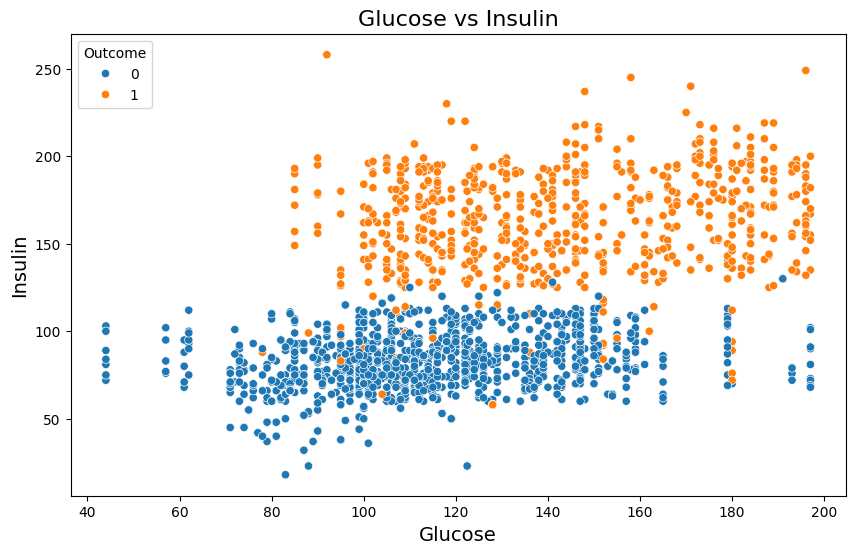

In [ ]:
import seaborn as sns

# Plot Glucose and Insulin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Insulin', data=df, hue='Outcome')
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('Insulin', fontsize=14)
plt.title('Glucose vs Insulin', fontsize=16)
plt.show()

Patients: R-squared = 0.023604951371773097, MSE = 1191.9889987862562
Non-Patients: R-squared = 0.09823582114947293, MSE = 359.58759417405804


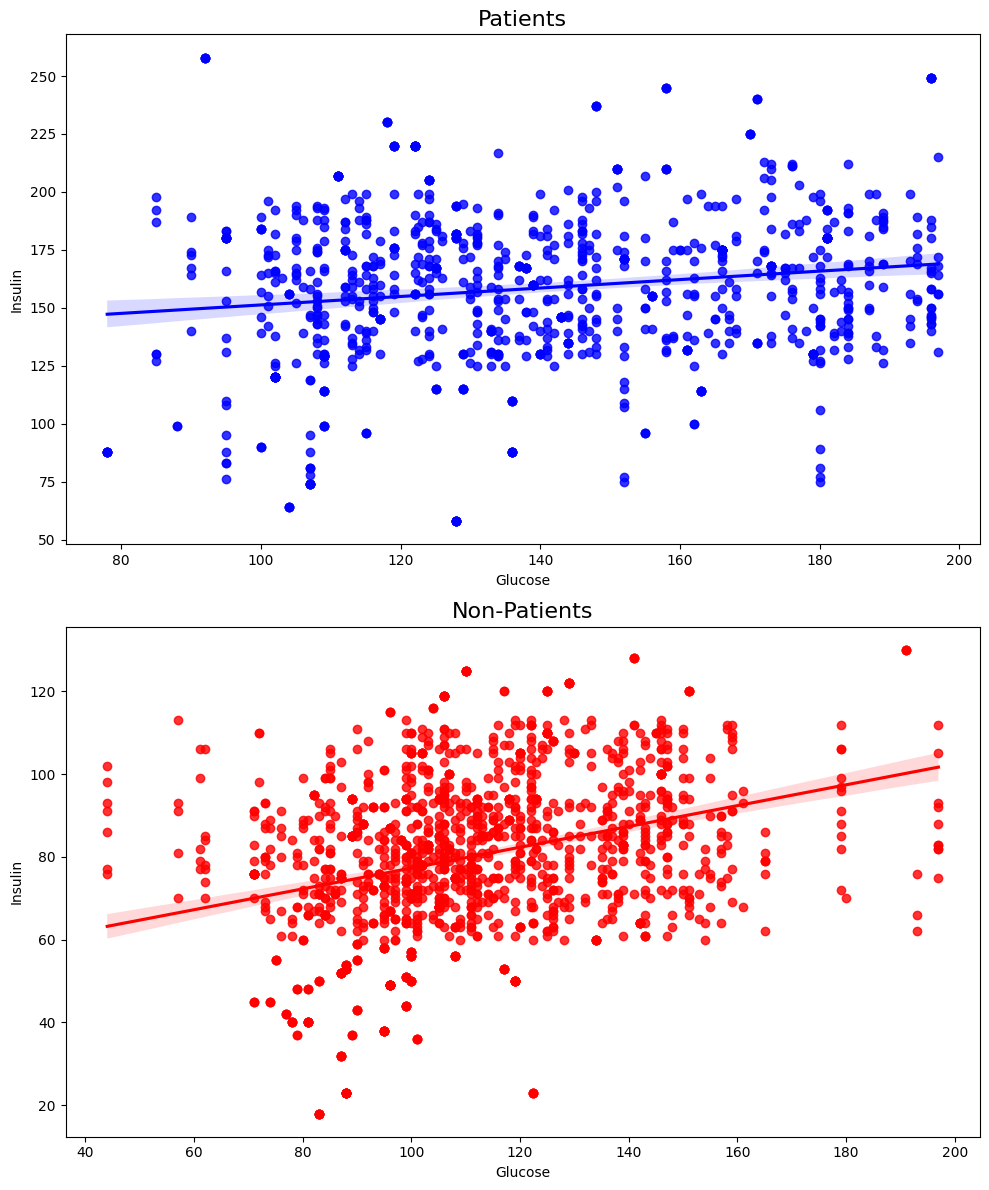

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

# Create a figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot Glucose vs Insulin for patients
sns.regplot(x='Glucose', y='Insulin', data=patients, ax=ax[0], color='b')
ax[0].set_title('Patients', fontsize=16)

# Fit a linear regression model and calculate R-squared and MSE for patients
model = LinearRegression().fit(patients[['Glucose']], patients['Insulin'])
predictions = model.predict(patients[['Glucose']])
r2_patients = r2_score(patients['Insulin'], predictions)
mse_patients = mean_squared_error(patients['Insulin'], predictions)
print(f'Patients: R-squared = {r2_patients}, MSE = {mse_patients}')

# Plot Glucose vs Insulin for non-patients
sns.regplot(x='Glucose', y='Insulin', data=non_patients, ax=ax[1], color='r')
ax[1].set_title('Non-Patients', fontsize=16)

# Fit a linear regression model and calculate R-squared and MSE for non-patients
model = LinearRegression().fit(non_patients[['Glucose']], non_patients['Insulin'])
predictions = model.predict(non_patients[['Glucose']])
r2_non_patients = r2_score(non_patients['Insulin'], predictions)
mse_non_patients = mean_squared_error(non_patients['Insulin'], predictions)
print(f'Non-Patients: R-squared = {r2_non_patients}, MSE = {mse_non_patients}')

plt.tight_layout()
plt.show()

Null Hypothesis (H0): There is no significant difference in mean glucose levels between diabetic and non-diabetic individuals.

Alternative Hypothesis (H1): There is a significant difference in mean glucose levels between diabetic and non-diabetic individuals.

<Axes: title={'center': 'Glucose distribution'}, xlabel='Glucose', ylabel='Frequency'>

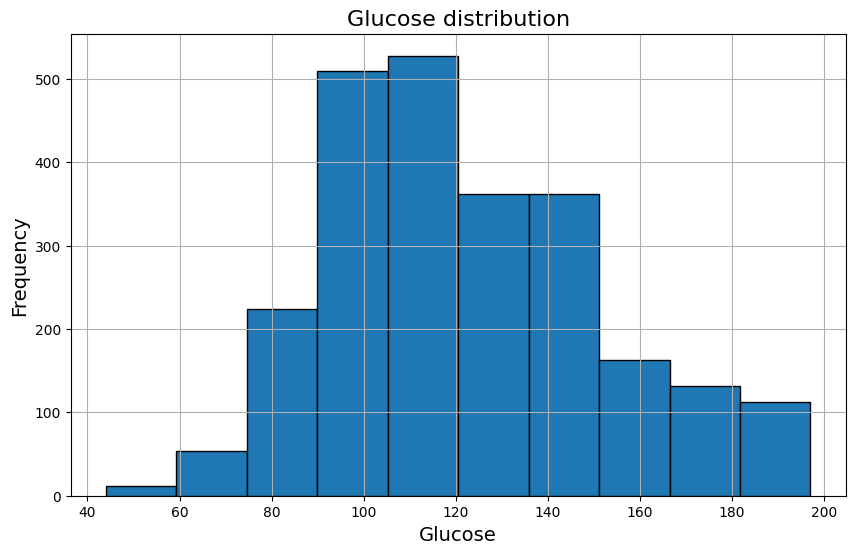

In [ ]:
# Plot distribution of Glucose
plt.figure(figsize=(10, 6))
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Glucose distribution', fontsize=16)

# Create histogram
df['Glucose'].hist(edgecolor='black')

Text(0.5, 1.0, 'Q-Q plot for Glucose')

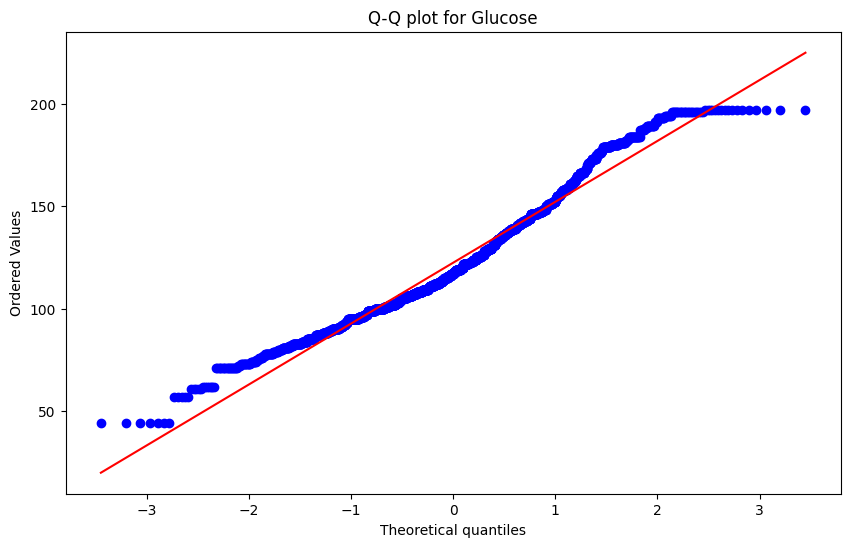

In [ ]:
# qq plot for Glucose
plt.figure(figsize=(10, 6))
stats.probplot(df['Glucose'], dist="norm", plot=plt)
plt.title('Q-Q plot for Glucose')

Text(0, 0.5, 'Glucose')

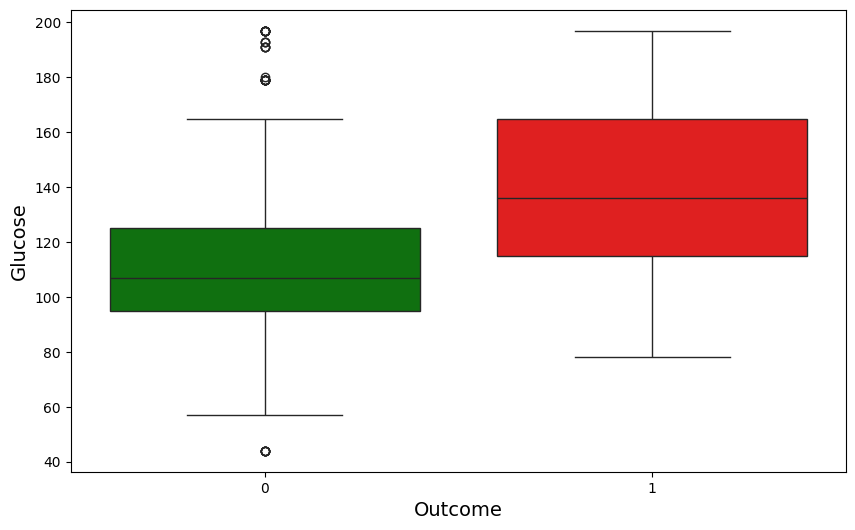

In [ ]:
# Box plot for Glucose
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette=['green', 'red'])
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Glucose', fontsize=14)

In [ ]:
# Mean and stadar deviation of Glucose for people with diabetes and without diabetes
df.groupby('Outcome')['Glucose'].agg(['mean', 'std'])


,mean,std
Outcome,,
0,111.392919,24.899868
1,139.722126,29.466320


In [ ]:
glucose_non_diabetic = df[df['Outcome'] == 0]['Glucose'].sample(50)
glucose_diabetic = df[df['Outcome'] == 1]['Glucose'].sample(50)

# find standard deviation and mean of glucose for diabetic and non-diabetic samples
std_glucose_non_diabetic = glucose_non_diabetic.std()
mean_glucose_non_diabetic = glucose_non_diabetic.mean()

std_glucose_diabetic = glucose_diabetic.std()
mean_glucose_diabetic = glucose_diabetic.mean() 

print(f'Standard deviation of glucose for non-diabetic individuals: {std_glucose_non_diabetic}')
print(f'Mean of glucose for non-diabetic individuals: {mean_glucose_non_diabetic}')

print(f'Standard deviation of glucose for diabetic individuals: {std_glucose_diabetic}')
print(f'Mean of glucose for diabetic individuals: {mean_glucose_diabetic}')


# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(glucose_non_diabetic, glucose_diabetic, equal_var=False)  # Welch's t-test

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean glucose levels between diabetic and non-diabetic individuals.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean glucose levels between diabetic and non-diabetic individuals.")

# Find 95% confidence interval for the mean glucose levels of diabetic and non-diabetic individuals
# Calculate the standard error and the degrees of freedom
se_non_diabetic = std_glucose_non_diabetic / np.sqrt(50)
df_non_diabetic = 50 - 1

se_diabetic = std_glucose_diabetic / np.sqrt(50)
df_diabetic = 50 - 1

# Calculate the 95% confidence intervals
ci_non_diabetic = stats.t.interval(0.95, df_non_diabetic, loc=mean_glucose_non_diabetic, scale=se_non_diabetic)
ci_diabetic = stats.t.interval(0.95, df_diabetic, loc=mean_glucose_diabetic, scale=se_diabetic)

print(f'95% confidence interval for mean glucose level of non-diabetic individuals: {ci_non_diabetic}')
print(f'95% confidence interval for mean glucose level of diabetic individuals: {ci_diabetic}')

Standard deviation of glucose for non-diabetic individuals: 24.492197841395143
Mean of glucose for non-diabetic individuals: 109.64
Standard deviation of glucose for diabetic individuals: 26.458870662496047
Mean of glucose for diabetic individuals: 140.36
T-statistic: -6.024827653368325
P-value: 3.012038192365765e-08
Reject the null hypothesis: There is a significant difference in mean glucose levels between diabetic and non-diabetic individuals.
95% confidence interval for mean glucose level of non-diabetic individuals: (102.67939438929619, 116.60060561070381)
95% confidence interval for mean glucose level of diabetic individuals: (132.8404721577504, 147.87952784224962)


In [ ]:
# Separate the glucose levels into two groups
glucose_non_diabetic = df[df['Outcome'] == 0]['Glucose']
glucose_diabetic = df[df['Outcome'] == 1]['Glucose']

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)  # Standard error of the mean
    h = std_err * stats.t.ppf((1 + confidence) / 2., n-1)  # Margin of error
    return mean, mean - h, mean + h

# Calculate for non-diabetic patients
mean_non_diabetic, ci_lower_non_diabetic, ci_upper_non_diabetic = confidence_interval(glucose_non_diabetic)

# Calculate for diabetic patients
mean_diabetic, ci_lower_diabetic, ci_upper_diabetic = confidence_interval(glucose_diabetic)

print(f'Non-diabetic: Mean = {round(mean_non_diabetic,2)}, 95% CI = ({round(ci_lower_non_diabetic,2)}, {round(ci_upper_non_diabetic,2)})')
print(f'Diabetic: Mean = {round(mean_diabetic,2)}, 95% CI = ({round(ci_lower_diabetic,2)}, {round(ci_upper_diabetic,2)})')

Non-diabetic: Mean = 111.39, 95% CI = (110.13, 112.65)
Diabetic: Mean = 139.72, 95% CI = (137.86, 141.59)


The code you've run calculates the mean and 95% confidence interval (CI) for the 'Glucose' levels in both non-diabetic and diabetic patients.

The mean 'Glucose' level for non-diabetic patients is 111.39, with a 95% CI of (110.13, 112.65). This means that we are 95% confident that the true mean 'Glucose' level for the non-diabetic population is between 110.13 and 112.65.

The mean 'Glucose' level for diabetic patients is 139.72, with a 95% CI of (137.86, 141.59). This means that we are 95% confident that the true mean 'Glucose' level for the diabetic population is between 137.86 and 141.59.

From these results, we can conclude that the mean 'Glucose' level is significantly higher in diabetic patients compared to non-diabetic patients. This suggests that 'Glucose' level could be a good predictor for diabetes. However, further statistical tests would be needed to confirm this.

---

Null Hypothesis (H0): There is no significant difference in mean BMI levels between diabetic and non-diabetic individuals.

Alternative Hypothesis (H1): There is a significant difference in mean BMI levels between diabetic and non-diabetic individuals.

Text(0, 0.5, 'BMI')

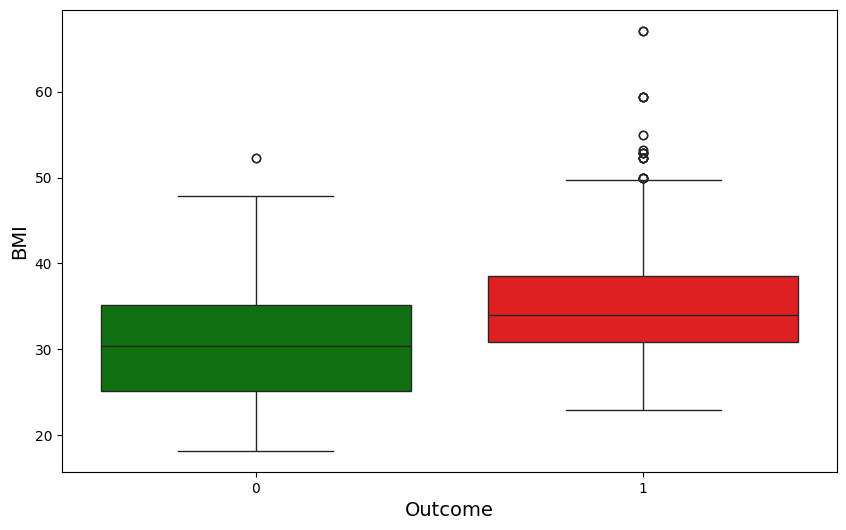

In [ ]:
# Box plot for BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df, palette=['green', 'red'])
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('BMI', fontsize=14)

In [ ]:
# Fill outliers with random values of BMI with value larger than 45
outliers_condition = (df['BMI'] > 45)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(40, 48, size=num_outliers)
df.loc[outliers_condition, 'BMI'] = random_values

<Axes: title={'center': 'BMI distribution'}, xlabel='BMI', ylabel='Frequency'>

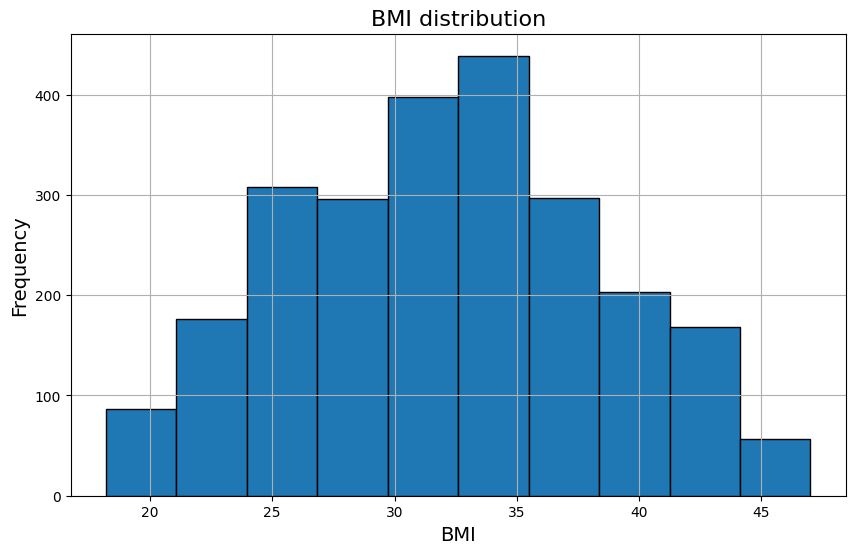

In [ ]:
# plot BMI distribution
plt.figure(figsize=(10, 6))
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('BMI distribution', fontsize=16)

df['BMI'].hist(edgecolor='black')

Text(0.5, 1.0, 'Q-Q plot for BMI')

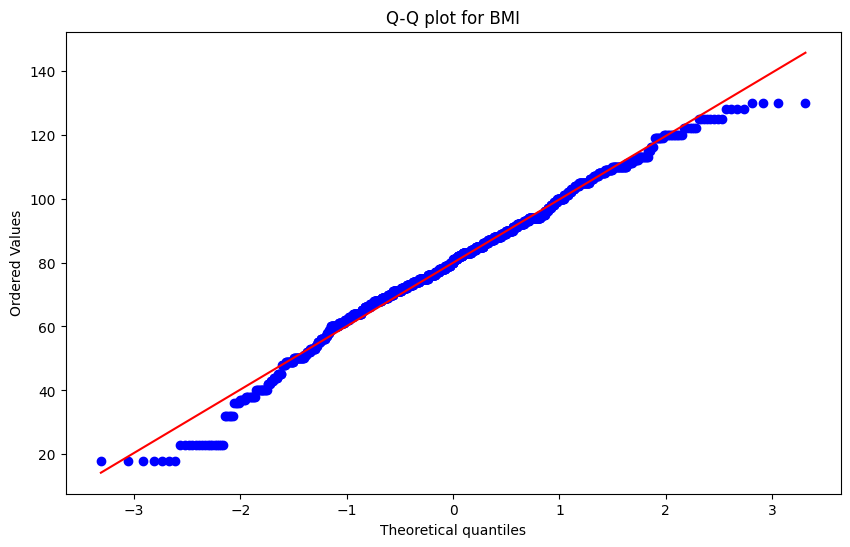

In [ ]:
# qq plot for BMI
plt.figure(figsize=(10, 6))
stats.probplot(df[df['Outcome']==0]['Insulin'], dist="norm", plot=plt)
plt.title('Q-Q plot for BMI')

<Axes: title={'center': 'BMI distribution for non-diabetic'}, xlabel='BMI', ylabel='Frequency'>

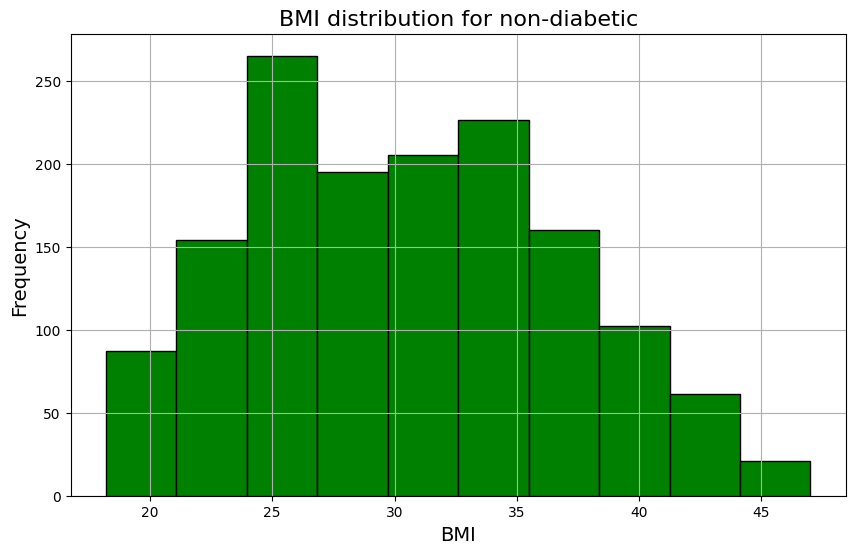

In [ ]:
# plot BMI distribution for non-diabetic
plt.figure(figsize=(10, 6))
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('BMI distribution for non-diabetic', fontsize=16)

df[df['Outcome'] == 0]['BMI'].hist(edgecolor='black',color='green')

Text(0.5, 1.0, 'Q-Q plot for BMI of non-diabetic')

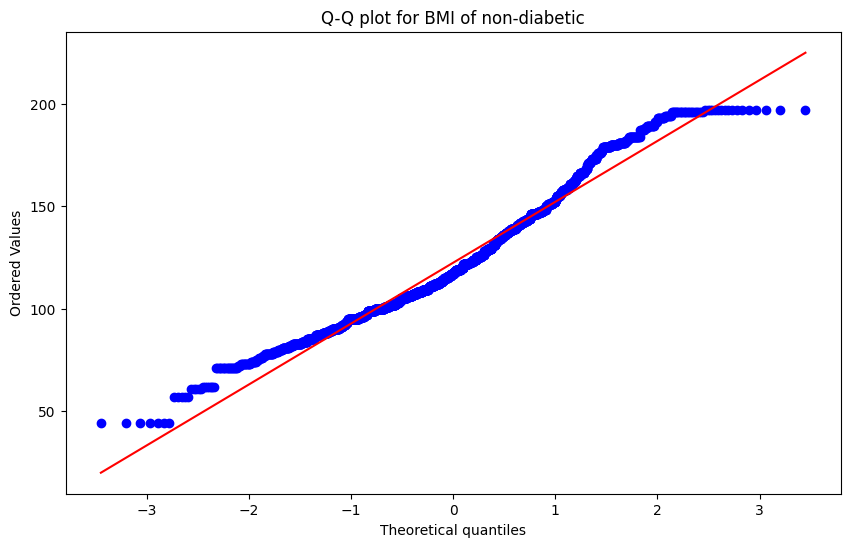

In [ ]:
# qq plot for BMI of non-diabetic
plt.figure(figsize=(10, 6))
stats.probplot(df['Glucose'], dist="norm", plot=plt)
plt.title('Q-Q plot for BMI of non-diabetic')

<Axes: title={'center': 'BMI distribution for diabetic'}, xlabel='BMI', ylabel='Frequency'>

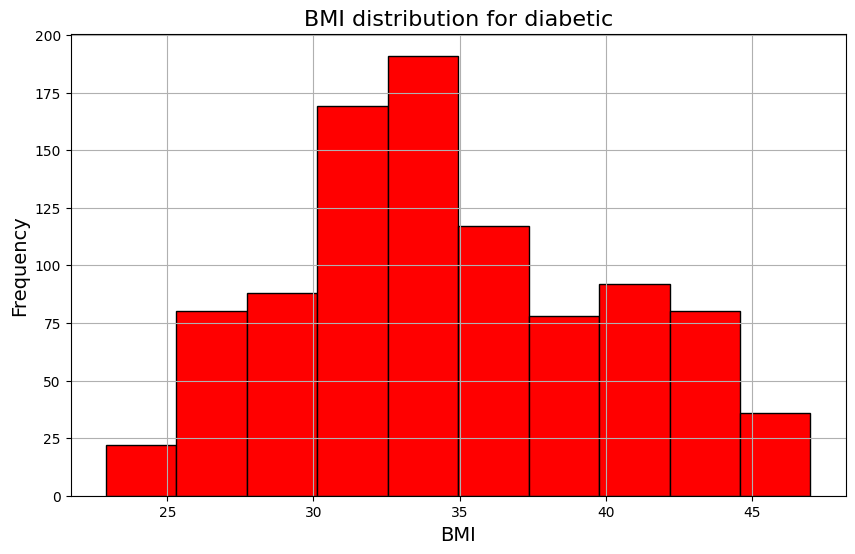

In [ ]:
# plot BMI distribution for diabetic
plt.figure(figsize=(10, 6))
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('BMI distribution for diabetic', fontsize=16)

df[df['Outcome'] == 1]['BMI'].hist(edgecolor='black',color='red')

Text(0.5, 1.0, 'Q-Q plot for BMI of diabetic')

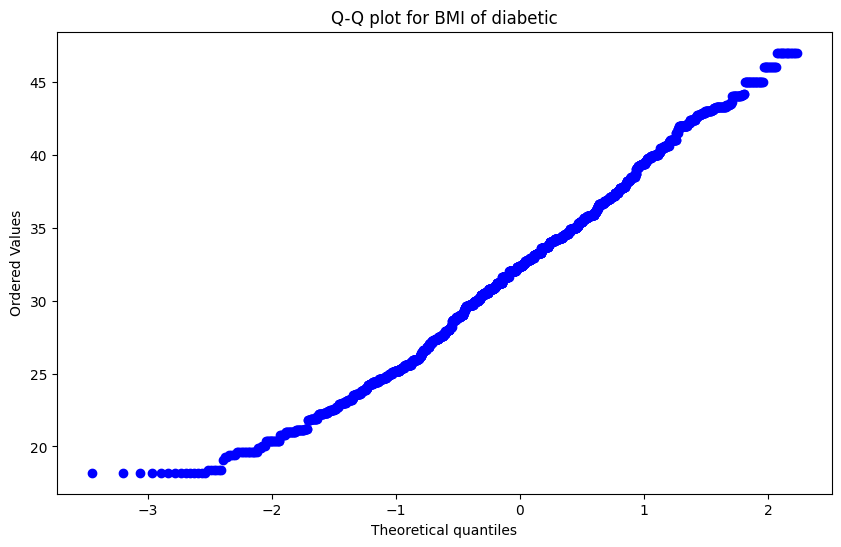

In [ ]:
# qq plot for BMI of diabetic
plt.figure(figsize=(10, 6))
stats.probplot(df['BMI'], dist="norm", plot=plt)
plt.title('Q-Q plot for BMI of diabetic')

In [ ]:
bmi_non_diabetic = df[df['Outcome'] == 0]['BMI'].sample(50)
bmi_diabetic = df[df['Outcome'] == 1]['BMI'].sample(50)
# find standard deviation and mean of BMI for diabetic and non-diabetic samples
std_bmi_non_diabetic = bmi_non_diabetic.std()
mean_bmi_non_diabetic = bmi_non_diabetic.mean()

std_bmi_diabetic = bmi_diabetic.std()
mean_bmi_diabetic = bmi_diabetic.mean() 

print(f'Standard deviation of BMI for non-diabetic individuals: {std_bmi_non_diabetic}')
print(f'Mean of BMI for non-diabetic individuals: {mean_bmi_non_diabetic}')

print(f'Standard deviation of BMI for diabetic individuals: {std_bmi_diabetic}')
print(f'Mean of BMI for diabetic individuals: {mean_bmi_diabetic}')


# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(bmi_non_diabetic, bmi_diabetic, equal_var=False)  # Welch's t-test

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean BMI between diabetic and non-diabetic individuals.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean BMI between diabetic and non-diabetic individuals.")

# Find 95% confidence interval for the mean BMI of diabetic and non-diabetic individuals
# Calculate the standard error and the degrees of freedom
se_non_diabetic = std_bmi_non_diabetic / np.sqrt(50)
df_non_diabetic = 50 - 1

se_diabetic = std_bmi_diabetic / np.sqrt(50)
df_diabetic = 50 - 1

# Calculate the 95% confidence intervals
ci_non_diabetic = stats.t.interval(0.95, df_non_diabetic, loc=mean_bmi_non_diabetic, scale=se_non_diabetic)
ci_diabetic = stats.t.interval(0.95, df_diabetic, loc=mean_bmi_diabetic, scale=se_diabetic)

print(f'95% confidence interval for mean BMI of non-diabetic individuals: {ci_non_diabetic}')
print(f'95% confidence interval for mean BMI of diabetic individuals: {ci_diabetic}')

Standard deviation of BMI for non-diabetic individuals: 6.6297470614866425
Mean of BMI for non-diabetic individuals: 31.008333333333336
Standard deviation of BMI for diabetic individuals: 4.994081803617607
Mean of BMI for diabetic individuals: 33.442
T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: There is no significant difference in mean BMI between diabetic and non-diabetic individuals.
95% confidence interval for mean BMI of non-diabetic individuals: (29.124180065726776, 32.8924866009399)
95% confidence interval for mean BMI of diabetic individuals: (32.022697655323434, 34.86130234467657)
